# Introduction

# Libraries

In [1]:
!pip install -q feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer

import json
import pickle

# Data Loading

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
total 0
cat: /root/.kaggle/kaggle.json: No such file or directory


In [4]:
!kaggle datasets download -d zeesolver/consumer-behavior-and-shopping-habits-dataset

Dataset URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
License(s): CC0-1.0
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 32.5MB/s]


In [5]:
!unzip -jq /content/consumer-behavior-and-shopping-habits-dataset.zip

In [6]:
df = pd.read_csv('shopping_behavior_updated.csv', encoding='latin-1')
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts    S     Maroon  Spring   
3                        90   Rhode Island    M     Maroon  Spring   
4                        49         Oregon    M  Turquoise  Spring   
...                     ...            ...  ...        ...     ...   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air              Yes   
4               2.7                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo            Fortnightly  
1                Yes                   2           Cash            Fortnightly  
2                Yes                  23    Credit Card                 Weekly  
3                Yes                  49         PayPal                 Weekly  
4                Yes                  31         PayPal               Annually  
...              ...                 ...            ...                    ...  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly  

[3900 rows x 18 columns]

In [7]:
# drop Customer ID karna tidak dibutuhkan, karna data hanya berisi customer id
df.drop('Customer ID', axis=1, inplace=True)

# drop data yang memiliki frequency of purchases annually, every 3 months, dan quarterly karna data yang dibutuhkan hanya yang terjadi setiap 1 bulan
df = df.drop(df[(df['Frequency of Purchases'] == 'Annually') |
                (df['Frequency of Purchases'] == 'Every 3 Months') |
                (df['Frequency of Purchases'] == 'Quarterly')].index)


# Descriptive statistics of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2181 entries, 0 to 3898
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2181 non-null   int64  
 1   Gender                  2181 non-null   object 
 2   Item Purchased          2181 non-null   object 
 3   Category                2181 non-null   object 
 4   Purchase Amount (USD)   2181 non-null   int64  
 5   Location                2181 non-null   object 
 6   Size                    2181 non-null   object 
 7   Color                   2181 non-null   object 
 8   Season                  2181 non-null   object 
 9   Review Rating           2181 non-null   float64
 10  Subscription Status     2181 non-null   object 
 11  Shipping Type           2181 non-null   object 
 12  Discount Applied        2181 non-null   object 
 13  Promo Code Used         2181 non-null   object 
 14  Previous Purchases      2181 non-null   int64

In [9]:
df.describe()

Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  2181.000000            2181.000000    2181.000000         2181.000000
mean     43.929390              59.515360       3.749519           25.275562
std      15.032337              23.502789       0.715103           14.354065
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.800000           25.000000
75%      57.000000              80.000000       4.400000           37.000000
max      70.000000             100.000000       5.000000           50.000000

# EDA

In [10]:
dfEDA = df.copy()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

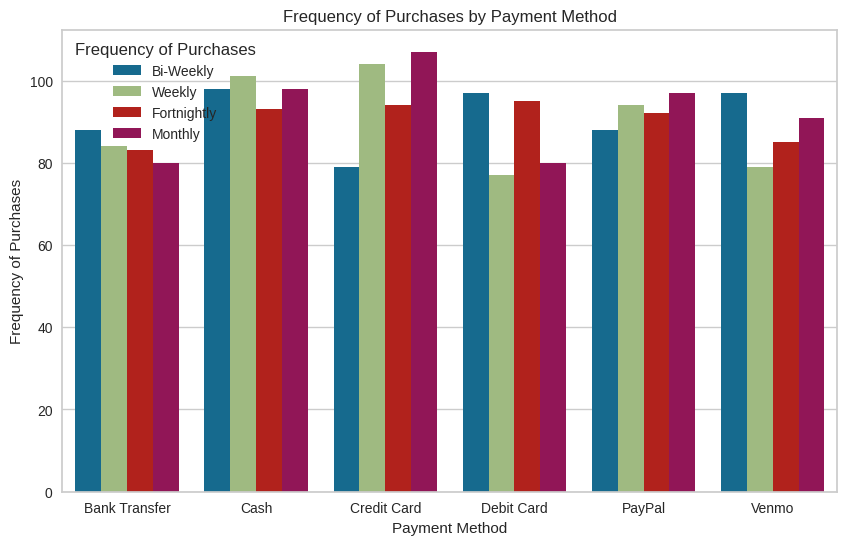

In [11]:
# Filter hanya untuk frekuensi pembelian yang diinginkan
desired_frequencies = ['Bi-Weekly', 'Monthly', 'Weekly', 'Fortnightly']
filtered_df = dfEDA[dfEDA['Frequency of Purchases'].isin(desired_frequencies)]

# Lakukan grouping berdasarkan variabel 'payment_method' dan 'frequency_of_purchases'
grouped_df = filtered_df.groupby('Payment Method')['Frequency of Purchases'].value_counts().reset_index(name='count')

# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Payment Method', y='count', hue='Frequency of Purchases')
plt.title('Frequency of Purchases by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency of Purchases')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

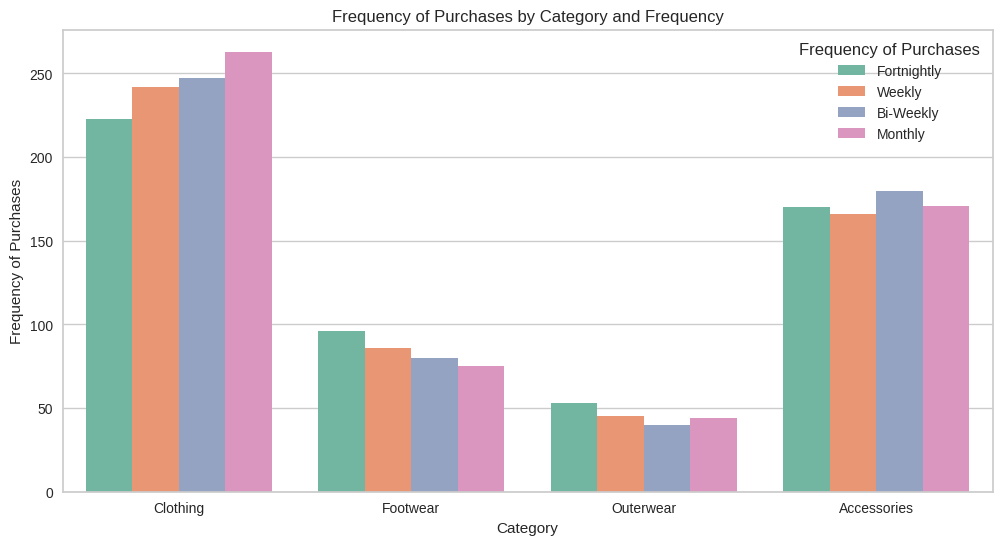

In [14]:
# Filter hanya untuk frekuensi pembelian yang diinginkan
desired_frequencies = ['Bi-Weekly', 'Monthly', 'Weekly', 'Fortnightly']
df_filtered = dfEDA[dfEDA['Frequency of Purchases'].isin(desired_frequencies)]

# Buat plot menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Category', hue='Frequency of Purchases', palette='Set2')
plt.title('Frequency of Purchases by Category and Frequency')
plt.xlabel('Category')
plt.ylabel('Frequency of Purchases')
plt.legend(title='Frequency of Purchases')
plt.show()



In [15]:
# Mendapatkan isi dari kolom 'location'
locations = dfEDA['Location'].unique()

# Print isi dari kolom 'location'
print(locations)


['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Wyoming' 'Louisiana'
 'Arkansas' 'Hawaii' 'Delaware' 'New Hampshire' 'New York' 'Alabama'
 'Montana' 'Oklahoma' 'Florida' 'North Carolina' 'West Virginia'
 'Illinois' 'Indiana' 'Arizona' 'Ohio' 'Nevada' 'New Jersey' 'Maryland'
 'Alaska' 'Mississippi' 'New Mexico' 'Missouri' 'Idaho' 'Connecticut'
 'Tennessee' 'Nebraska' 'Texas' 'South Carolina' 'South Dakota'
 'North Dakota' 'Minnesota' 'Virginia' 'Washington' 'California'
 'Pennsylvania' 'Colorado' 'Georgia' 'Vermont' 'Kansas' 'Wisconsin' 'Utah'
 'Iowa' 'Oregon' 'Michigan']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

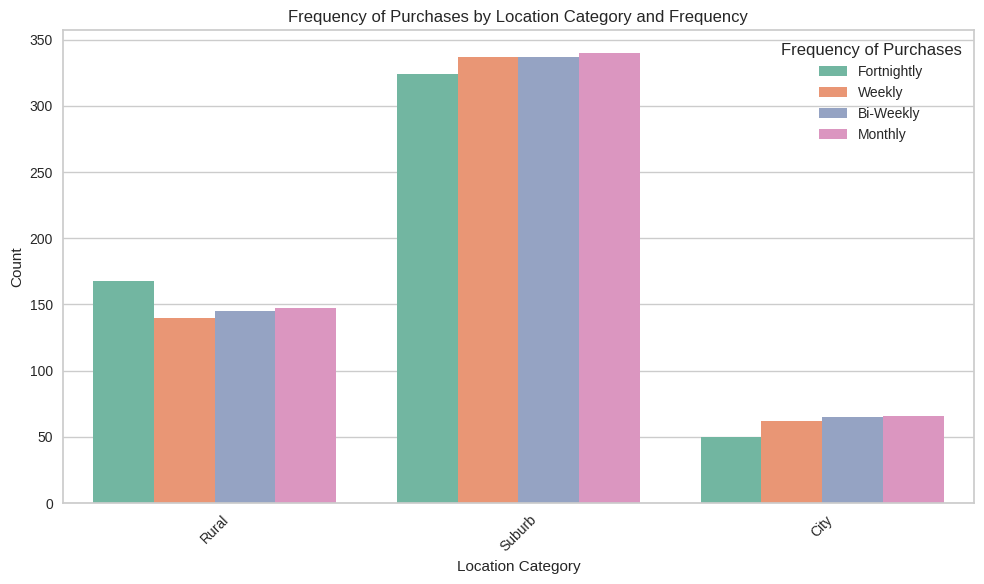

In [16]:
# Membuat pemetaan untuk mengubah location menjadi kategori yang diinginkan
location_mapping = {
    'Kentucky': 'Rural',
    'Maine': 'Rural',
    'Massachusetts': 'Suburb',
    'Rhode Island': 'Suburb',
    'Oregon': 'Suburb',
    'Wyoming': 'Rural',
    'Montana': 'Rural',
    'Louisiana': 'Suburb',
    'West Virginia': 'Rural',
    'Missouri': 'Suburb',
    'Arkansas': 'Suburb',
    'Hawaii': 'Rural',
    'Delaware': 'Suburb',
    'New Hampshire': 'Rural',
    'New York': 'City',
    'Alabama': 'Suburb',
    'Mississippi': 'Suburb',
    'North Carolina': 'Suburb',
    'California': 'City',
    'Oklahoma': 'Suburb',
    'Florida': 'City',
    'Texas': 'City',
    'Nevada': 'Suburb',
    'Kansas': 'Suburb',
    'Colorado': 'Suburb',
    'North Dakota': 'Rural',
    'Illinois': 'City',
    'Indiana': 'Suburb',
    'Arizona': 'Suburb',
    'Alaska': 'Rural',
    'Tennessee': 'Suburb',
    'Ohio': 'Suburb',
    'New Jersey': 'Suburb',
    'Maryland': 'Suburb',
    'Vermont': 'Rural',
    'New Mexico': 'Suburb',
    'South Carolina': 'Suburb',
    'Idaho': 'Rural',
    'Pennsylvania': 'Suburb',
    'Connecticut': 'Suburb',
    'Utah': 'Suburb',
    'Virginia': 'Suburb',
    'Georgia': 'Suburb',
    'Nebraska': 'Rural',
    'Iowa': 'Rural',
    'South Dakota': 'Rural',
    'Minnesota': 'Suburb',
    'Washington': 'Suburb',
    'Wisconsin': 'Suburb',
    'Michigan': 'Suburb'
}

# Menggunakan pemetaan untuk mengubah nilai 'location' menjadi kategori yang diinginkan
dfEDA['Location Category'] = dfEDA['Location'].map(location_mapping)

# Filter hanya untuk frekuensi pembelian yang diinginkan
desired_frequencies = ['Bi-Weekly', 'Monthly', 'Weekly', 'Fortnightly']
df_filtered = dfEDA[dfEDA['Frequency of Purchases'].isin(desired_frequencies)]

# Hitung frekuensi kemunculan setiap lokasi
location_counts = df_filtered['Location Category'].value_counts()

# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Location Category', hue='Frequency of Purchases', palette='Set2')
plt.title('Frequency of Purchases by Location Category and Frequency')
plt.xlabel('Location Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Frequency of Purchases')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


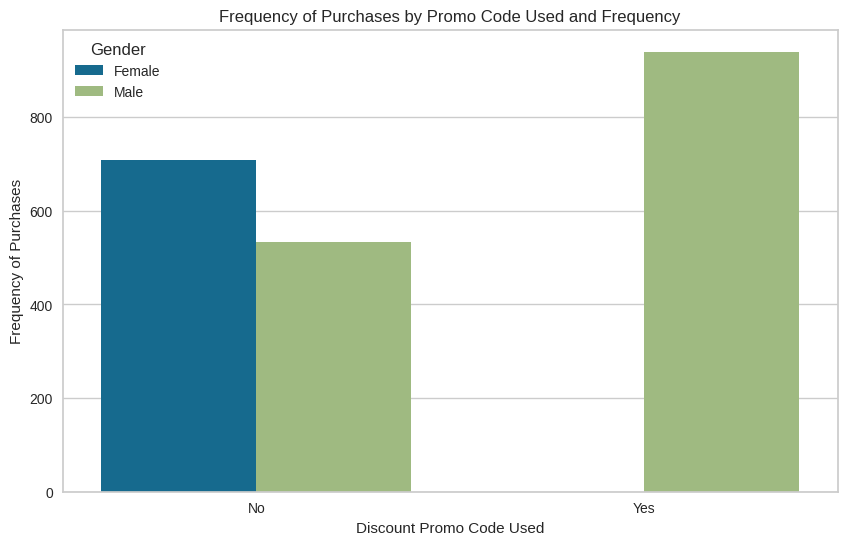

In [17]:
# Filter hanya untuk frekuensi pembelian yang diinginkan
desired_frequencies = ['Bi-Weekly', 'Monthly', 'Weekly', 'Fortnightly']
df_filtered = dfEDA[dfEDA['Frequency of Purchases'].isin(desired_frequencies)]

# Lakukan grouping berdasarkan variabel 'promo_code_used' dan 'frequency_of_purchases'
grouped_df = dfEDA.groupby('Promo Code Used')['Gender'].value_counts().reset_index(name='count')

# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Promo Code Used', y='count', hue='Gender')
plt.title('Frequency of Purchases by Promo Code Used and Frequency')
plt.xlabel('Discount Promo Code Used')
plt.ylabel('Frequency of Purchases')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


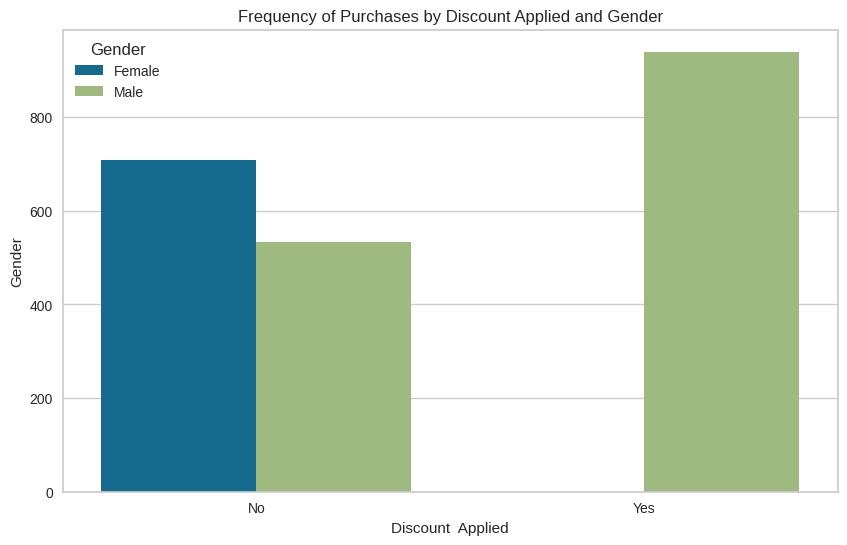

In [18]:
# Filter hanya untuk frekuensi pembelian yang diinginkan
desired_frequencies = ['Bi-Weekly', 'Monthly', 'Weekly', 'Fortnightly']
df_filtered = dfEDA[dfEDA['Frequency of Purchases'].isin(desired_frequencies)]

# Lakukan grouping berdasarkan variabel 'promo_code_used' dan 'frequency_of_purchases'
grouped_df = dfEDA.groupby('Discount Applied')['Gender'].value_counts().reset_index(name='count')

# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Discount Applied', y='count', hue='Gender')
plt.title('Frequency of Purchases by Discount Applied and Gender')
plt.xlabel('Discount  Applied')
plt.ylabel('Gender')
plt.show()


# Feature Engineering

In [19]:
# mengelompokan kolom
numerik = df.select_dtypes(exclude=['object', 'datetime64']).columns.tolist()
kategorik = df.select_dtypes(include=['object']).columns.tolist()

print('Data Numerik', numerik)
print('Data Numerik', kategorik)

Data Numerik ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Data Numerik ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']


## Feature Transformation

### Handling Outliers

In [20]:
# cek distribusi
listItem = []

for col in numerik:
  skew = df[col].skew()

  if skew < -1 and skew > 1:
    skewness = 'Highly Skewed'
  elif (-1 < skew < -0.05) or (0.05 > skew >= 1):
    skewness = 'Moderately Skewed'
  else:
    skewness = 'Aproximately Symmetric'
  listItem.append([col, skew, skewness])

pd.DataFrame(columns=['nama', 'nilai skewness', 'skewness'], data = listItem)

nama  nilai skewness                skewness
0                    Age        0.012309  Aproximately Symmetric
1  Purchase Amount (USD)        0.016778  Aproximately Symmetric
2          Review Rating       -0.009481  Aproximately Symmetric
3     Previous Purchases        0.002419  Aproximately Symmetric

In [21]:
# melakukan capping pada data yang skew dengan metode z-score/gaussian
winsoriser = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=numerik,
                            missing_values='ignore')

dfCapped = winsoriser.fit_transform(df)

In [22]:
# membuat fungsi untuk membuat histogram dan boxplot
def diagnosticPlots(df, variable):
    # menjabarkan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Sebelum Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


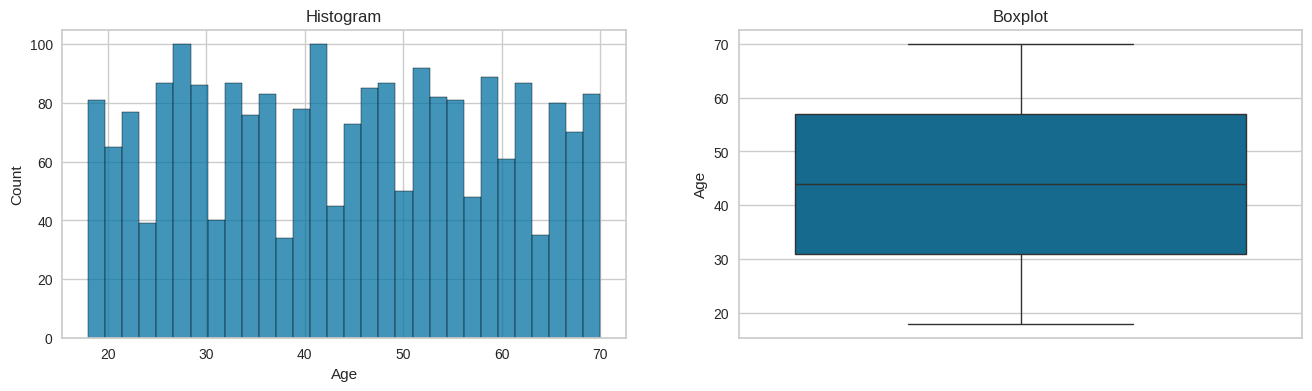


Age - Sesudah Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


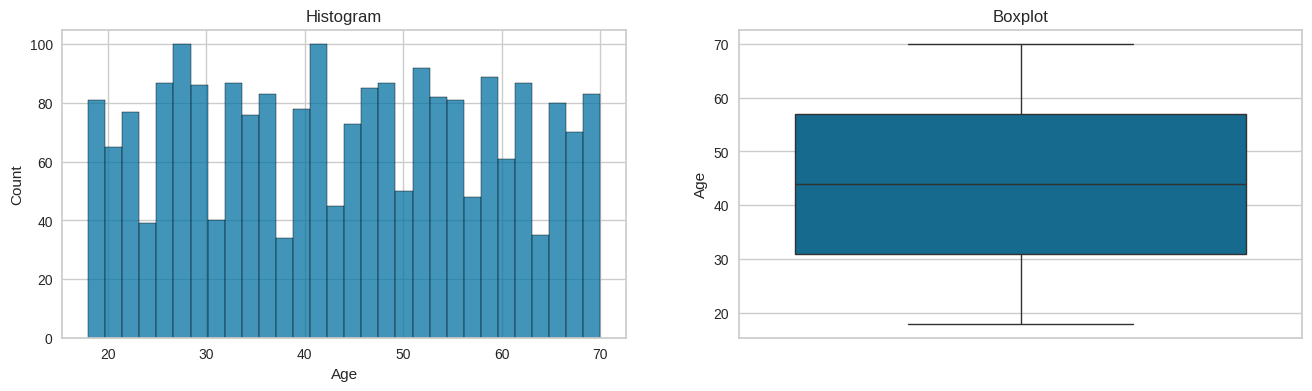

Purchase Amount (USD) - Sebelum Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


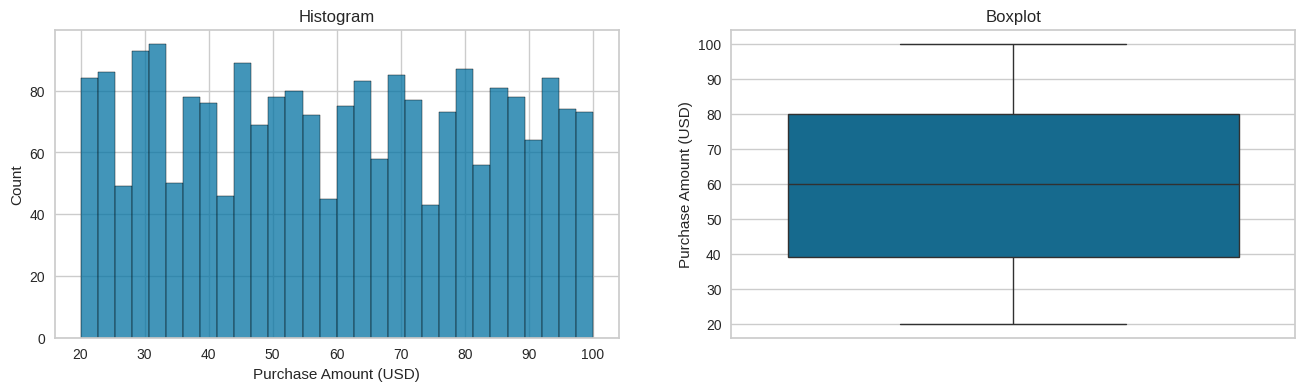


Purchase Amount (USD) - Sesudah Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


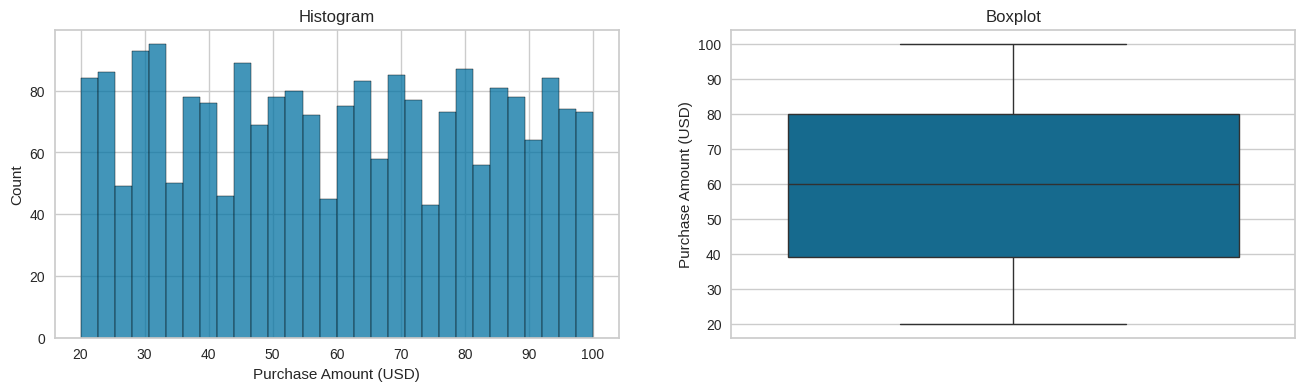

Review Rating - Sebelum Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


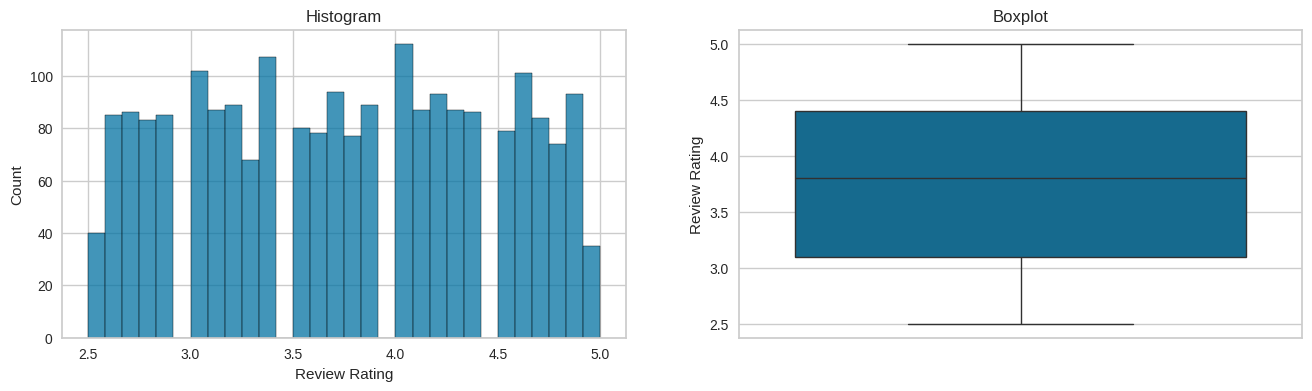


Review Rating - Sesudah Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


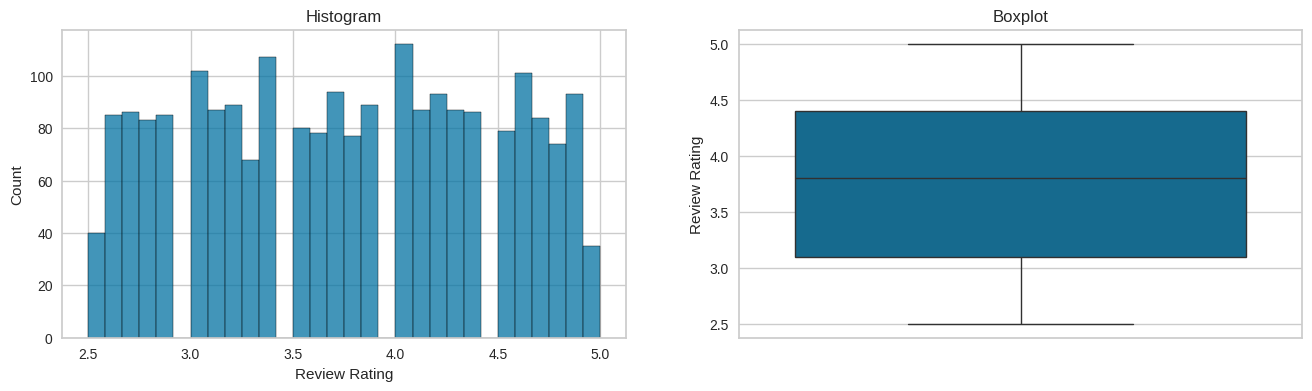

Previous Purchases - Sebelum Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


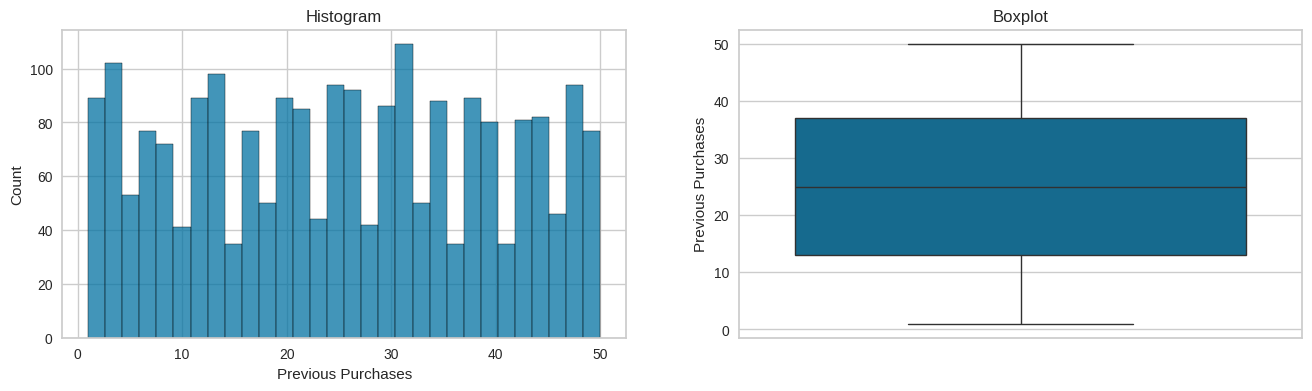


Previous Purchases - Sesudah Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


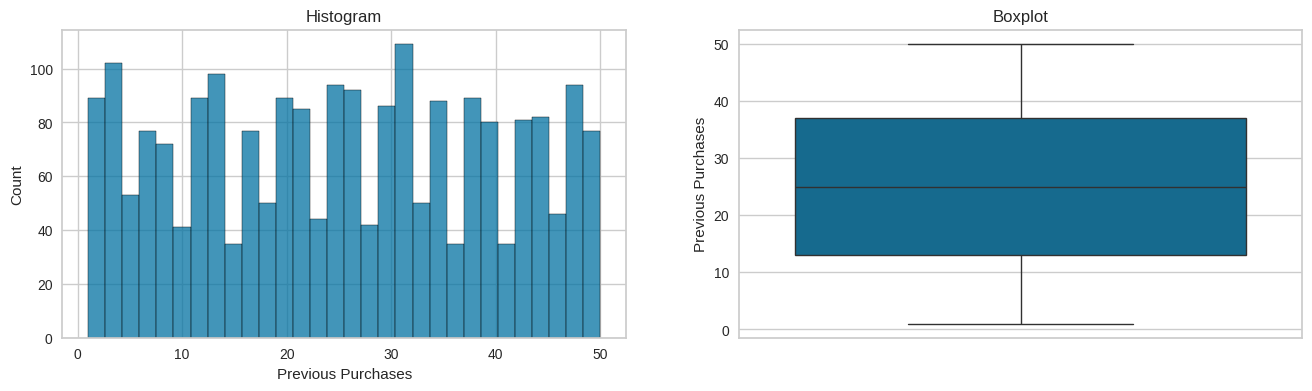

In [23]:
# Cek distribusi setelah
for col in numerik:
  print(f'{col} - Sebelum Capping')
  diagnosticPlots(df, col)

  print(f'\n{col} - Sesudah Capping')
  diagnosticPlots(dfCapped, col)

### Missing Values Handling

In [24]:
# cek missing values
dfCapped.isnull().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

### Split between Numerik columns and Categorical columns

In [25]:
# memisahkan data bedasarkan kolom numerik dan kategorik
dfNum = dfCapped[numerik]
dfKat = dfCapped[kategorik]

dfNum

Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0      55                     53            3.1                  14
1      19                     64            3.1                   2
2      50                     73            3.1                  23
3      21                     90            3.5                  49
5      46                     20            2.9                  14
...   ...                    ...            ...                 ...
3892   35                     86            3.5                   5
3893   21                     64            3.3                  29
3895   40                     28            4.2                  32
3896   52                     49            4.5                  41
3898   44                     77            3.8                  24

[2181 rows x 4 columns]

### Feature Scaling

In [26]:
#Feature Scaling menggunakaan RobustScaler
scaler = StandardScaler()
scaler.fit(dfNum)

dfNumScaled = scaler.transform(dfNum)

dfNumScaled

array([[ 0.7366219 , -0.27728004, -0.90849488, -0.78571108],
       [-1.65876451,  0.19085686, -0.90849488, -1.62190294],
       [ 0.40392934,  0.57387797, -0.90849488, -0.15856718],
       ...,
       [-0.26145577, -1.34122754,  0.63009757,  0.46857672],
       [ 0.53700636, -0.44751164,  1.04971369,  1.09572062],
       [ 0.00469827,  0.74410957,  0.07060941, -0.08888452]])

### Feature Encoding

In [27]:
# membuat variabel penampung nilai unuk pada setiap kolom kategorik pada data train
unikGender = list(dfKat['Gender'].unique())
unikIP = list(dfKat['Item Purchased'].unique())
unikCat = list(dfKat['Category'].unique())
unikLoc = list(dfKat['Location'].unique())
unikSize = list(dfKat['Size'].unique())
unikColor = list(dfKat['Color'].unique())
unikSeason = list(dfKat['Season'].unique())
unikSubStat = list(dfKat['Subscription Status'].unique())
unikShipType = list(dfKat['Shipping Type'].unique())
unikDA = list(dfKat['Discount Applied'].unique())
unikPCU = list(dfKat['Promo Code Used'].unique())
unikPM = list(dfKat['Payment Method'].unique())
unikFoP = list(dfKat['Frequency of Purchases'].unique())

unik = [unikGender, unikIP, unikCat, unikLoc, unikSize, unikColor,
        unikSeason, unikSubStat, unikShipType, unikDA, unikPCU, unikPM, unikFoP]

unik

[['Male', 'Female'],
 ['Blouse',
  'Sweater',
  'Jeans',
  'Sandals',
  'Sneakers',
  'Shorts',
  'Shoes',
  'Coat',
  'Dress',
  'Skirt',
  'Sunglasses',
  'Pants',
  'Jacket',
  'Jewelry',
  'T-shirt',
  'Scarf',
  'Hat',
  'Shirt',
  'Hoodie',
  'Backpack',
  'Belt',
  'Boots',
  'Gloves',
  'Socks',
  'Handbag'],
 ['Clothing', 'Footwear', 'Outerwear', 'Accessories'],
 ['Kentucky',
  'Maine',
  'Massachusetts',
  'Rhode Island',
  'Wyoming',
  'Louisiana',
  'Arkansas',
  'Hawaii',
  'Delaware',
  'New Hampshire',
  'New York',
  'Alabama',
  'Montana',
  'Oklahoma',
  'Florida',
  'North Carolina',
  'West Virginia',
  'Illinois',
  'Indiana',
  'Arizona',
  'Ohio',
  'Nevada',
  'New Jersey',
  'Maryland',
  'Alaska',
  'Mississippi',
  'New Mexico',
  'Missouri',
  'Idaho',
  'Connecticut',
  'Tennessee',
  'Nebraska',
  'Texas',
  'South Carolina',
  'South Dakota',
  'North Dakota',
  'Minnesota',
  'Virginia',
  'Washington',
  'California',
  'Pennsylvania',
  'Colorado',
  '

In [28]:
# encode kolom kategorik
encoder = OneHotEncoder(categories = unik)
encoder.fit(dfKat)

OneHotEncoder(categories=[['Male', 'Female'],
                          ['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers',
                           'Shorts', 'Shoes', 'Coat', 'Dress', 'Skirt',
                           'Sunglasses', 'Pants', 'Jacket', 'Jewelry',
                           'T-shirt', 'Scarf', 'Hat', 'Shirt', 'Hoodie',
                           'Backpack', 'Belt', 'Boots', 'Gloves', 'Socks',
                           'Handbag'],
                          ['Clothing', 'Footwear', 'Outerwear', 'Accessories'],
                          ['Kentucky', 'Maine', 'Massachuset...
                           'Brown', 'Cyan', 'Turquoise', 'Lavender', 'Silver',
                           'Orange', 'Indigo', 'Red', 'Peach', 'Yellow',
                           'Magenta', 'Pink', 'Blue', 'Beige'],
                          ['Winter', 'Spring', 'Summer', 'Fall'], ['Yes', 'No'],
                          ['Express', 'Free Shipping', 'Next Day Air',
                           'Standard', 'Store Pickup', '2-Day Shipping'],
                          ['Yes', 'No'], ['Yes', 'No'],
                          ['Venmo', 'Cash', 'Credit Card', 'PayPal',
                           'Bank Transfer', 'Debit Card'],
                          ['Fortnightly', 'Weekly', 'Bi-Weekly', 'Monthly']])

In [29]:
dfKatEncoded = encoder.transform(dfKat).toarray()
dfKatEncoded

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [30]:
# concate hasil dari scaling dan encoding
dfFinal = np.concatenate([dfNumScaled, dfKatEncoded], axis = 1)

dfFinal

array([[ 0.7366219 , -0.27728004, -0.90849488, ...,  0.        ,
         0.        ,  0.        ],
       [-1.65876451,  0.19085686, -0.90849488, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40392934,  0.57387797, -0.90849488, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26145577, -1.34122754,  0.63009757, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53700636, -0.44751164,  1.04971369, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.00469827,  0.74410957,  0.07060941, ...,  1.        ,
         0.        ,  0.        ]])

In [31]:
# membuat kolom untuk data encoding
unikCol = [item for col in unik for item in col]
unikCol

['Male',
 'Female',
 'Blouse',
 'Sweater',
 'Jeans',
 'Sandals',
 'Sneakers',
 'Shorts',
 'Shoes',
 'Coat',
 'Dress',
 'Skirt',
 'Sunglasses',
 'Pants',
 'Jacket',
 'Jewelry',
 'T-shirt',
 'Scarf',
 'Hat',
 'Shirt',
 'Hoodie',
 'Backpack',
 'Belt',
 'Boots',
 'Gloves',
 'Socks',
 'Handbag',
 'Clothing',
 'Footwear',
 'Outerwear',
 'Accessories',
 'Kentucky',
 'Maine',
 'Massachusetts',
 'Rhode Island',
 'Wyoming',
 'Louisiana',
 'Arkansas',
 'Hawaii',
 'Delaware',
 'New Hampshire',
 'New York',
 'Alabama',
 'Montana',
 'Oklahoma',
 'Florida',
 'North Carolina',
 'West Virginia',
 'Illinois',
 'Indiana',
 'Arizona',
 'Ohio',
 'Nevada',
 'New Jersey',
 'Maryland',
 'Alaska',
 'Mississippi',
 'New Mexico',
 'Missouri',
 'Idaho',
 'Connecticut',
 'Tennessee',
 'Nebraska',
 'Texas',
 'South Carolina',
 'South Dakota',
 'North Dakota',
 'Minnesota',
 'Virginia',
 'Washington',
 'California',
 'Pennsylvania',
 'Colorado',
 'Georgia',
 'Vermont',
 'Kansas',
 'Wisconsin',
 'Utah',
 'Iowa',
 'Or

In [32]:
# # mejadikan hasil concate data set train menjadi dataframe
finalDF = pd.DataFrame(dfFinal, columns = [numerik + unikCol])
finalDF

Age Purchase Amount (USD) Review Rating Previous Purchases Male  \
0     0.736622             -0.277280     -0.908495          -0.785711  1.0   
1    -1.658765              0.190857     -0.908495          -1.621903  1.0   
2     0.403929              0.573878     -0.908495          -0.158567  1.0   
3    -1.525687              1.297362     -0.349007           1.653182  1.0   
4     0.137775             -1.681691     -1.188239          -0.785711  1.0   
...        ...                   ...           ...                ...  ...   
2176 -0.594148              1.127131     -0.349007          -1.412855  0.0   
2177 -1.525687              0.190857     -0.628751           0.259529  0.0   
2178 -0.261456             -1.341228      0.630098           0.468577  0.0   
2179  0.537006             -0.447512      1.049714           1.095721  0.0   
2180  0.004698              0.744110      0.070609          -0.088885  0.0   

     Female Blouse Sweater Jeans Sandals  ... Venmo Cash Credit Card PayPal  \
0       0.0    1.0     0.0   0.0     0.0  ...   1.0  0.0         0.0    0.0   
1       0.0    0.0     1.0   0.0     0.0  ...   0.0  1.0         0.0    0.0   
2       0.0    0.0     0.0   1.0     0.0  ...   0.0  0.0         1.0    0.0   
3       0.0    0.0     0.0   0.0     1.0  ...   0.0  0.0         0.0    1.0   
4       0.0    0.0     0.0   0.0     0.0  ...   1.0  0.0         0.0    0.0   
...     ...    ...     ...   ...     ...  ...   ...  ...         ...    ...   
2176    1.0    0.0     0.0   0.0     0.0  ...   0.0  0.0         0.0    1.0   
2177    1.0    0.0     0.0   0.0     0.0  ...   0.0  0.0         0.0    0.0   
2178    1.0    0.0     0.0   0.0     0.0  ...   1.0  0.0         0.0    0.0   
2179    1.0    0.0     0.0   0.0     0.0  ...   0.0  0.0         0.0    0.0   
2180    1.0    0.0     0.0   0.0     0.0  ...   1.0  0.0         0.0    0.0   

     Bank Transfer Debit Card Fortnightly Weekly Bi-Weekly Monthly  
0              0.0        0.0         1.0    0.0       0.0     0.0  
1              0.0        0.0         1.0    0.0       0.0     0.0  
2              0.0        0.0         0.0    1.0       0.0     0.0  
3              0.0        0.0         0.0    1.0       0.0     0.0  
4              0.0        0.0         0.0    1.0       0.0     0.0  
...            ...        ...         ...    ...       ...     ...  
2176           0.0        0.0         1.0    0.0       0.0     0.0  
2177           1.0        0.0         0.0    0.0       1.0     0.0  
2178           0.0        0.0         0.0    1.0       0.0     0.0  
2179           1.0        0.0         0.0    0.0       1.0     0.0  
2180           0.0        0.0         0.0    1.0       0.0     0.0  

[2181 rows x 140 columns]

### PCA

In [33]:
# memadatkan feature dengan PCA
pca = PCA()
pca.fit(finalDF)

PCA()

Text(0, 0.5, 'Eigenvalues')

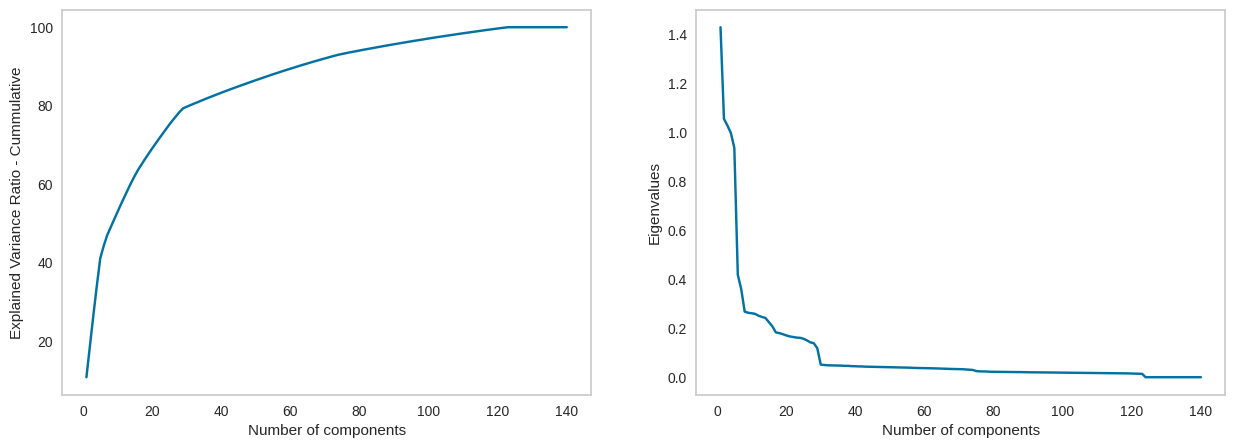

In [34]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 141), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 141), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [35]:
# Check the number of features if we want to retain 75 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
numFeatures = np.argmax(cumsum >= 0.80) + 1
numFeatures

31

In [36]:
# Let's train the model with reducing to 32 component

pca = PCA(n_components=31)
pca.fit(finalDF)

dfFinalPCA = pca.transform(finalDF)

In [37]:
dfFinalPCA

array([[ 1.46363873,  0.6151284 ,  1.08350138, ..., -0.07786819,
        -0.19449759,  0.31758006],
       [ 1.18895596,  2.65406743, -0.24450415, ..., -0.26022914,
         0.31723932,  0.19617972],
       [ 1.49019419,  0.31664052,  0.48686274, ..., -0.41094816,
        -0.10721492,  0.11457842],
       ...,
       [-1.11683541, -0.46122294,  0.26478953, ...,  0.06953373,
         0.22835247, -0.20075504],
       [-0.99863706, -1.54373592, -0.23987639, ..., -0.11796548,
        -0.01535447, -0.12690677],
       [-1.24764596, -0.21620835, -0.36568835, ..., -0.26617042,
        -0.10414974, -0.14916313]])

# UNSUPERVISED

## Clustering with K-Mean

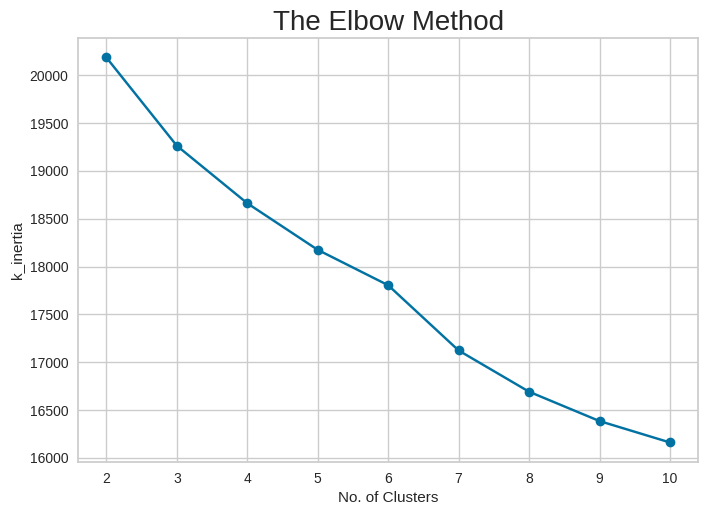

In [38]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11): #dicoba 2-10 nilai inertia
    km = KMeans(n_clusters = i, random_state = 3)
    km.fit(dfFinalPCA)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

In [39]:
#function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.12469694862874153
For n_clusters = 3 The average silhouette_score is : 0.0870663280675656
For n_clusters = 4 The average silhouette_score is : 0.07880446738313174
For n_clusters = 5 The average silhouette_score is : 0.07172000650346055
For n_clusters = 6 The average silhouette_score is : 0.07012871794195845
For n_clusters = 7 The average silhouette_score is : 0.06979611092078619
For n_clusters = 8 The average silhouette_score is : 0.06896156398790818
For n_clusters = 9 The average silhouette_score is : 0.06836700363203871
For n_clusters = 10 The average silhouette_score is : 0.06795264798100975


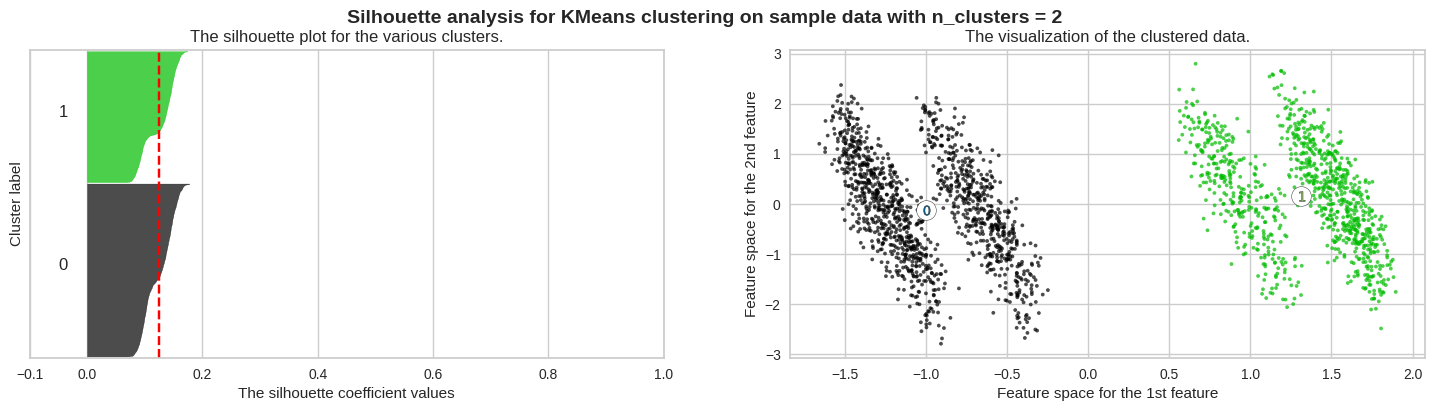

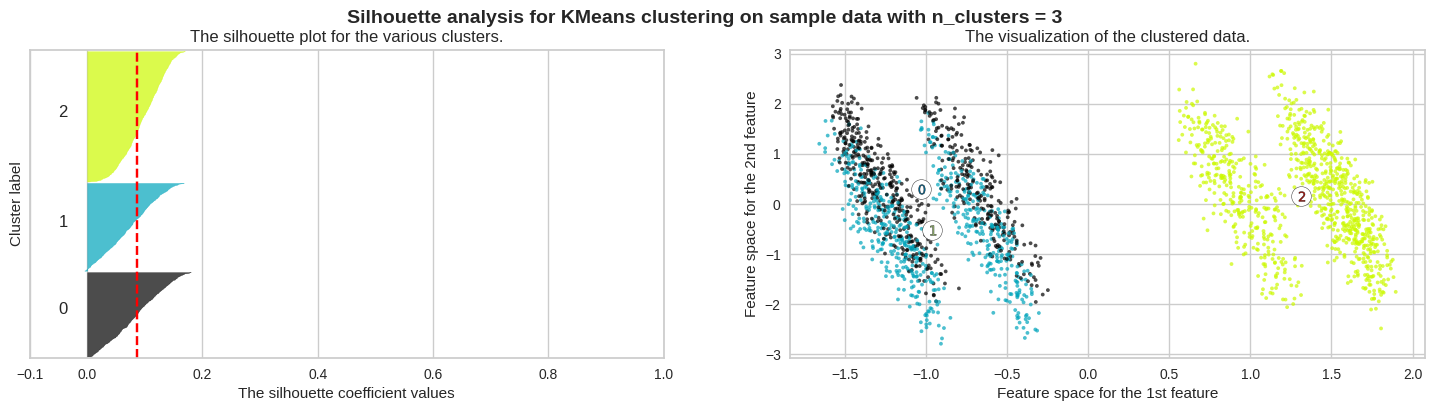

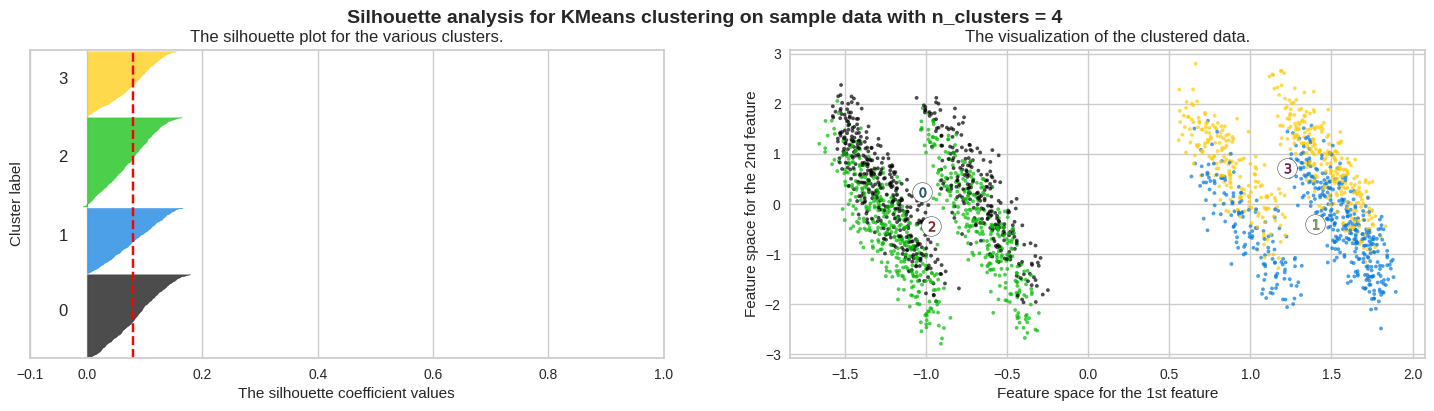

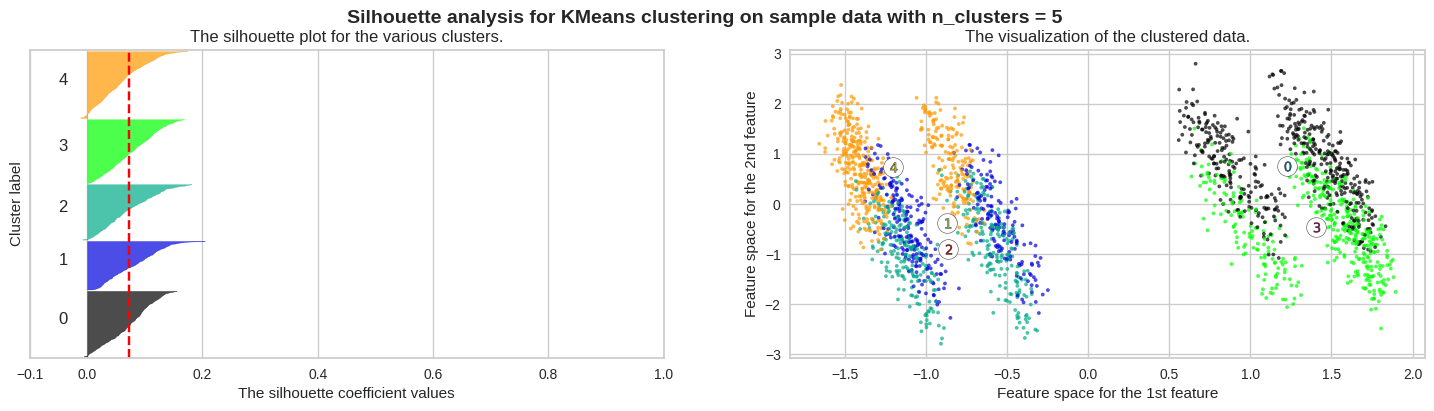

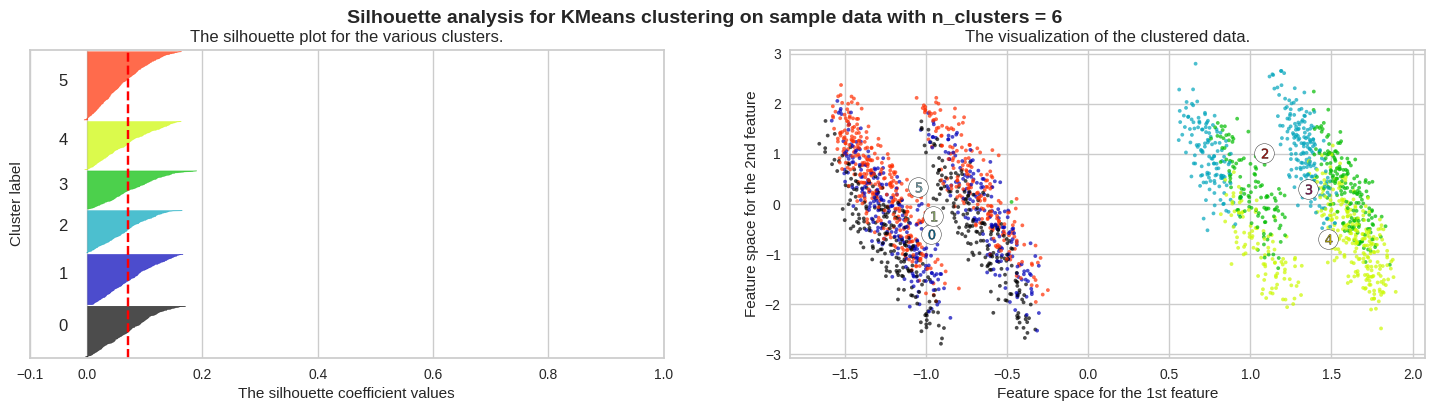

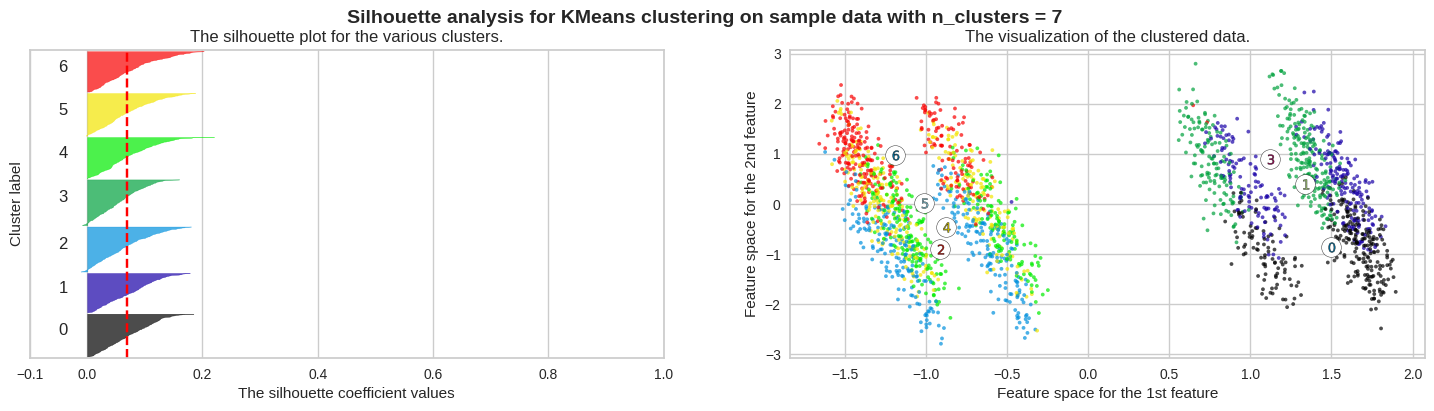

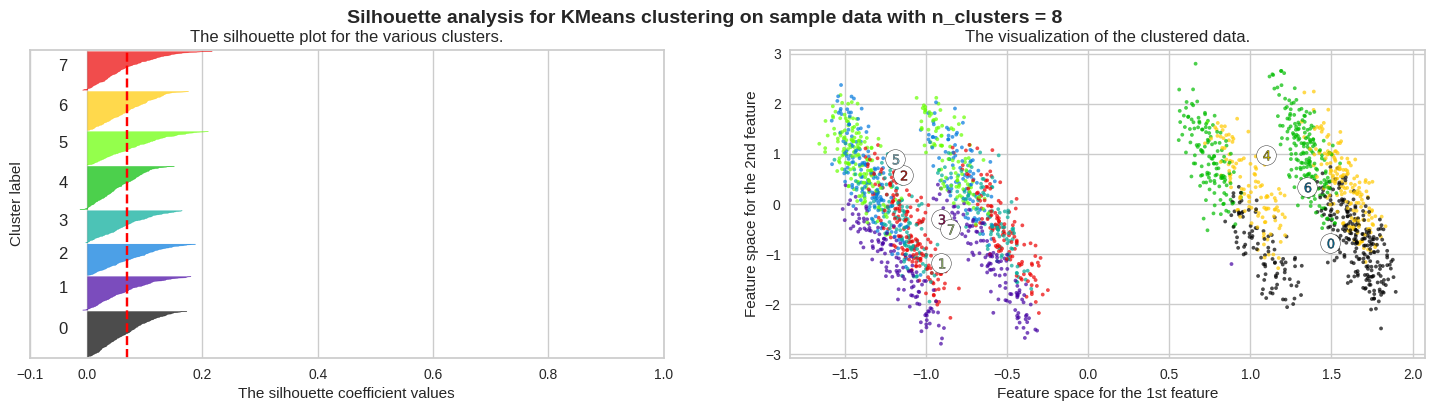

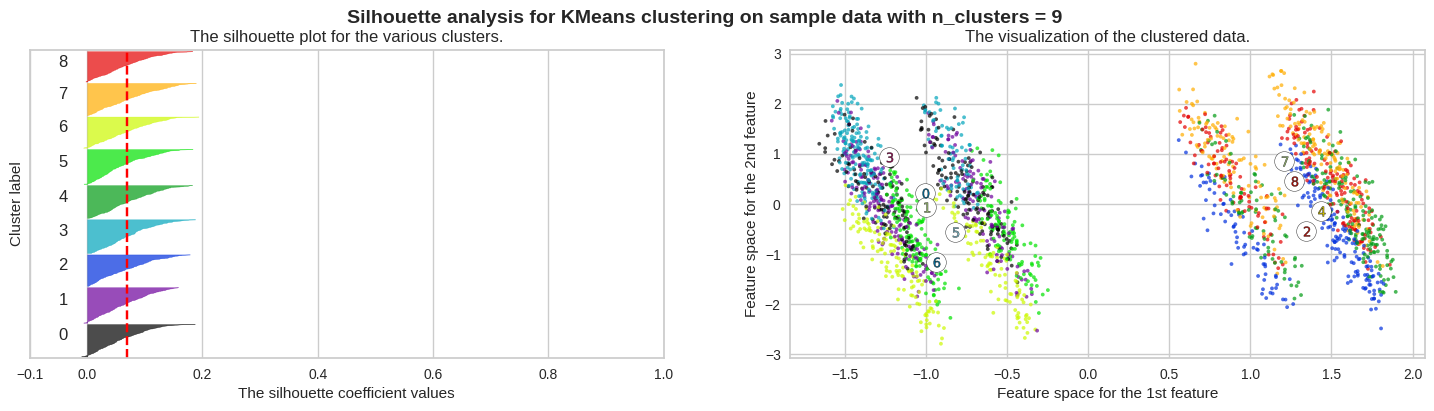

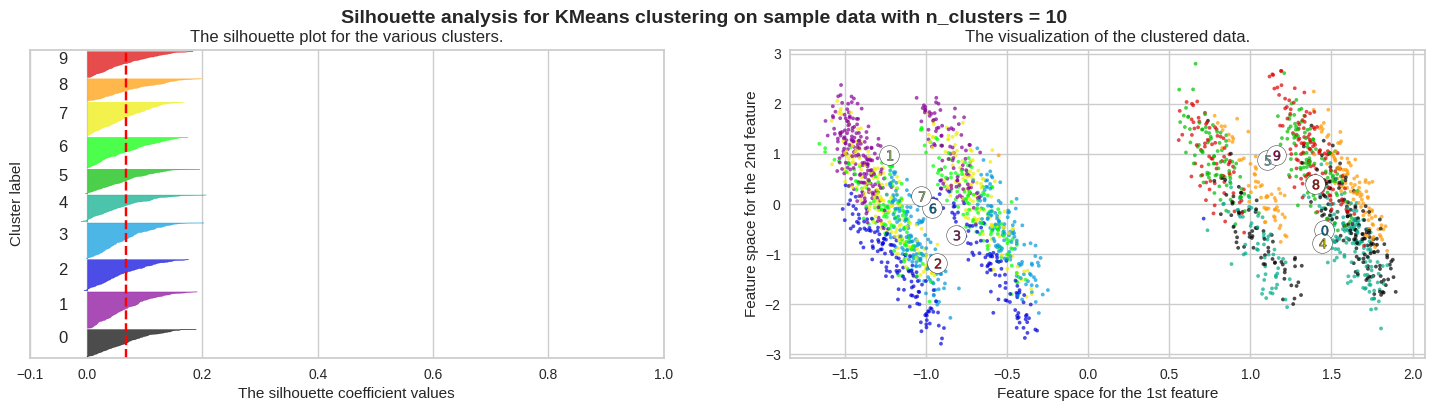

In [40]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, 11), dfFinalPCA, 3)

## Model training

In [41]:
km = KMeans(n_clusters = 10, random_state = 0)
km.fit(dfFinalPCA)

KMeans(n_clusters=10, random_state=0)

In [42]:
pred = km.predict(dfFinalPCA)
pred

array([3, 6, 7, ..., 9, 9, 5], dtype=int32)

In [43]:
#Iterasi menuju konvergen
km.n_iter_

25

In [44]:
df_kmeans = df.copy()
df_kmeans['cluster'] = pred
df_kmeans


Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
0      55    Male         Blouse     Clothing                     53   
1      19    Male        Sweater     Clothing                     64   
2      50    Male          Jeans     Clothing                     73   
3      21    Male        Sandals     Footwear                     90   
5      46    Male       Sneakers     Footwear                     20   
...   ...     ...            ...          ...                    ...   
3892   35  Female        Jewelry  Accessories                     86   
3893   21  Female            Hat  Accessories                     64   
3895   40  Female         Hoodie     Clothing                     28   
3896   52  Female       Backpack  Accessories                     49   
3898   44  Female          Shoes     Footwear                     77   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter            3.1   
1             Maine    L     Maroon  Winter            3.1   
2     Massachusetts    S     Maroon  Spring            3.1   
3      Rhode Island    M     Maroon  Spring            3.5   
5           Wyoming    M      White  Summer            2.9   
...             ...  ...        ...     ...            ...   
3892       Michigan    L     Indigo  Summer            3.5   
3893  Massachusetts    L      White    Fall            3.3   
3895       Virginia    L  Turquoise  Summer            4.2   
3896           Iowa    L      White  Spring            4.5   
3898      Minnesota    S      Brown  Summer            3.8   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes    Next Day Air              Yes             Yes   
5                    Yes        Standard              Yes             Yes   
...                  ...             ...              ...             ...   
3892                  No        Standard               No              No   
3893                  No    Store Pickup               No              No   
3895                  No  2-Day Shipping               No              No   
3896                  No    Store Pickup               No              No   
3898                  No         Express               No              No   

      Previous Purchases Payment Method Frequency of Purchases  cluster  
0                     14          Venmo            Fortnightly        3  
1                      2           Cash            Fortnightly        6  
2                     23    Credit Card                 Weekly        7  
3                     49         PayPal                 Weekly        2  
5                     14          Venmo                 Weekly        3  
...                  ...            ...                    ...      ...  
3892                   5         PayPal            Fortnightly        1  
3893                  29  Bank Transfer              Bi-Weekly        8  
3895                  32          Venmo                 Weekly        9  
3896                  41  Bank Transfer              Bi-Weekly        9  
3898                  24          Venmo                 Weekly        5  

[2181 rows x 18 columns]

### Visualisasi hasil clustering

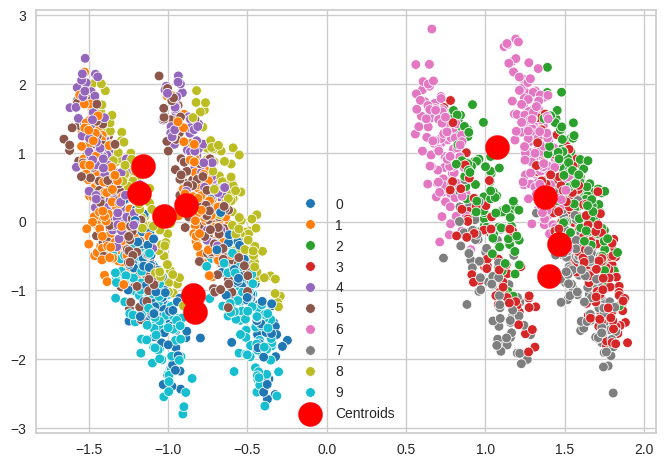

In [45]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(dfFinalPCA)

dfFinalPCA_2d = pca_2d.fit_transform(dfFinalPCA)

#scatter PC1 & PC2
sns.scatterplot(x=dfFinalPCA_2d[:,0], y=dfFinalPCA_2d[:,1], hue=df_kmeans['cluster'], palette='tab10')
#Titik Centroid/pusat
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.legend()
plt.show()

## GMM

In [46]:
n_components_range = range(1, 11)

# Inisialisasi variabel untuk menyimpan nilai AIC dan BIC
aic_values = []
bic_values = []

# Melakukan iterasi untuk setiap jumlah komponen
for n_components in n_components_range:
    # Membuat model GMM
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(dfFinalPCA)

    # Menghitung AIC dan BIC
    aic = gmm.aic(dfFinalPCA)
    bic = gmm.bic(dfFinalPCA)

    # Menyimpan nilai AIC dan BIC
    aic_values.append(aic)
    bic_values.append(bic)

    # Mencetak skor AIC dan BIC untuk setiap jumlah komponen
    print(f"Number of Components: {n_components}, AIC: {aic}, BIC: {bic}")

Number of Components: 1, AIC: 96607.8060591569, BIC: 99605.13898894515
Number of Components: 2, AIC: 66805.7972356832, BIC: 72806.15063402592
Number of Components: 3, AIC: 51903.839759759234, BIC: 60907.21362665641
Number of Components: 4, AIC: 44183.41037579067, BIC: 56189.80471124231
Number of Components: 5, AIC: 40897.68997717113, BIC: 55907.10478117723
Number of Components: 6, AIC: 38093.268346738194, BIC: 56105.70361929876
Number of Components: 7, AIC: 32772.30264431217, BIC: 53787.758385427194
Number of Components: 8, AIC: 23072.915937058362, BIC: 47091.39214672784
Number of Components: 9, AIC: 29897.87034776664, BIC: 56919.36702599058
Number of Components: 10, AIC: 37229.16302202734, BIC: 67253.68016880575


- AIC (Akaike Information Criterion) dan BIC (Bayesian Information Criterion) adalah dua metode untuk membandingkan model statistik yang berbeda. Keduanya berfungsi sebagai metode pemilihan model yang berguna untuk mengidentifikasi model mana yang paling cocok dengan data yang diamati.

    - AIC: AIC mengukur seberapa baik model cocok dengan data dengan mempertimbangkan kompleksitas model. AIC memberikan penilaian yang lebih baik untuk model yang lebih sederhana dan efisien dalam menggambarkan data. Semakin rendah nilai AIC, semakin baik modelnya.
    - BIC: BIC juga mengukur seberapa baik model cocok dengan data, tetapi dengan memberikan penalti yang lebih besar untuk model yang lebih kompleks. BIC cenderung memilih model yang lebih sederhana daripada AIC. Mirip dengan AIC, semakin rendah nilai BIC, semakin baik modelnya.

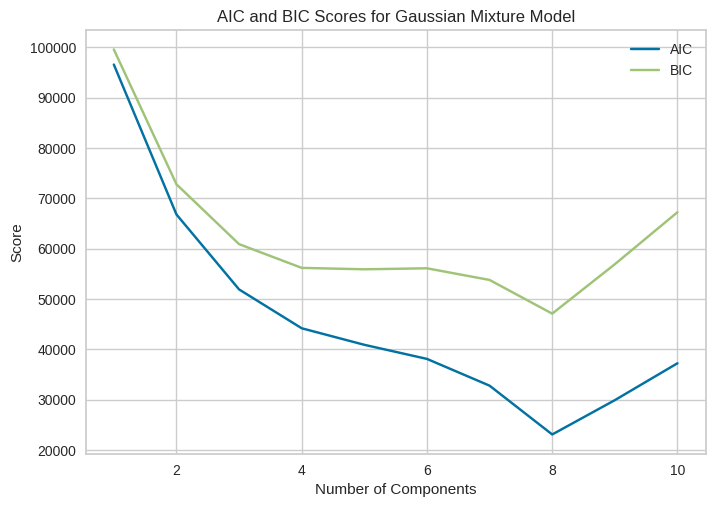

In [47]:
# Plot hasil AIC dan BIC untuk memilih jumlah komponen yang optimal
plt.plot(list(n_components_range), aic_values, label='AIC')
plt.plot(list(n_components_range), bic_values, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for Gaussian Mixture Model')
plt.legend()
plt.show()

dari score AIC dan BIC paling rendah adalah di number of components = 8

### Modelling GMM

In [48]:
n_clusters = 4

gmm = GaussianMixture(n_components=n_clusters)

pred_gmm = gmm.fit_predict(dfFinalPCA)

print(pred_gmm)

[1 1 1 ... 0 0 2]


In [49]:
df_gmm = df.copy()
df_gmm['Cluster'] = pred_gmm
df_gmm

Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
0      55    Male         Blouse     Clothing                     53   
1      19    Male        Sweater     Clothing                     64   
2      50    Male          Jeans     Clothing                     73   
3      21    Male        Sandals     Footwear                     90   
5      46    Male       Sneakers     Footwear                     20   
...   ...     ...            ...          ...                    ...   
3892   35  Female        Jewelry  Accessories                     86   
3893   21  Female            Hat  Accessories                     64   
3895   40  Female         Hoodie     Clothing                     28   
3896   52  Female       Backpack  Accessories                     49   
3898   44  Female          Shoes     Footwear                     77   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter            3.1   
1             Maine    L     Maroon  Winter            3.1   
2     Massachusetts    S     Maroon  Spring            3.1   
3      Rhode Island    M     Maroon  Spring            3.5   
5           Wyoming    M      White  Summer            2.9   
...             ...  ...        ...     ...            ...   
3892       Michigan    L     Indigo  Summer            3.5   
3893  Massachusetts    L      White    Fall            3.3   
3895       Virginia    L  Turquoise  Summer            4.2   
3896           Iowa    L      White  Spring            4.5   
3898      Minnesota    S      Brown  Summer            3.8   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes    Next Day Air              Yes             Yes   
5                    Yes        Standard              Yes             Yes   
...                  ...             ...              ...             ...   
3892                  No        Standard               No              No   
3893                  No    Store Pickup               No              No   
3895                  No  2-Day Shipping               No              No   
3896                  No    Store Pickup               No              No   
3898                  No         Express               No              No   

      Previous Purchases Payment Method Frequency of Purchases  Cluster  
0                     14          Venmo            Fortnightly        1  
1                      2           Cash            Fortnightly        1  
2                     23    Credit Card                 Weekly        1  
3                     49         PayPal                 Weekly        1  
5                     14          Venmo                 Weekly        1  
...                  ...            ...                    ...      ...  
3892                   5         PayPal            Fortnightly        0  
3893                  29  Bank Transfer              Bi-Weekly        0  
3895                  32          Venmo                 Weekly        0  
3896                  41  Bank Transfer              Bi-Weekly        0  
3898                  24          Venmo                 Weekly        2  

[2181 rows x 18 columns]

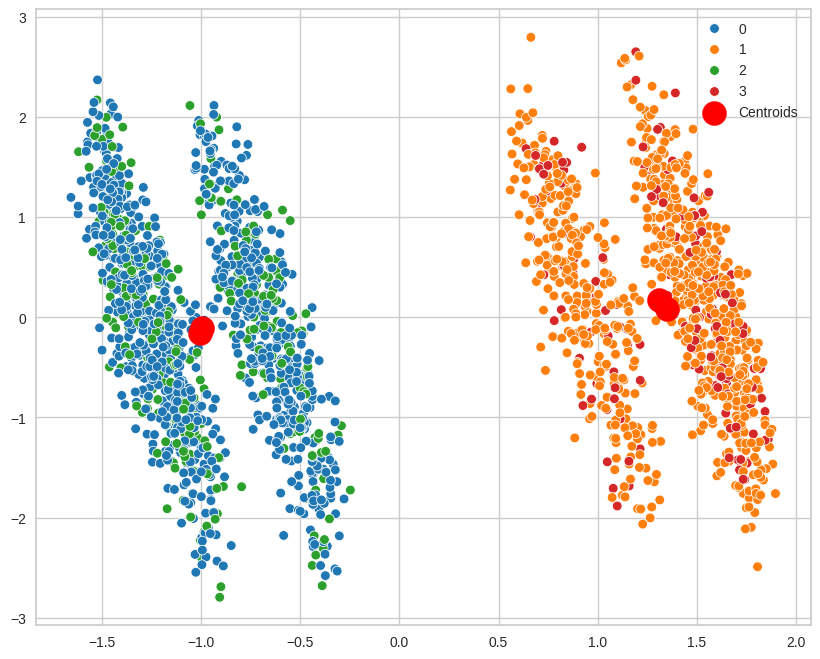

In [50]:
# Visualisasi clustering dengan GMM
plt.figure(figsize=(10, 8))
sns.scatterplot(x=dfFinalPCA[:, 0], y=dfFinalPCA[:, 1], hue=df_gmm['Cluster'], palette='tab10')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red', label='Centroids')
plt.legend()
plt.show()


In [52]:
df_gmm.to_csv('unsupervised_data.csv', index=False)

# EDA After Clustering

In [53]:
# membuat dataframe khusus eda
dfEDA2 = df_gmm.copy()

In [54]:
# deskripsi statistik bedasarkan cluster
cluster_stats = dfEDA2.groupby('Cluster').describe()
print(cluster_stats)

           Age                                                       \
         count       mean        std   min   25%   50%    75%   max   
Cluster                                                               
0        955.0  43.894241  14.930107  18.0  31.0  43.0  57.00  70.0   
1        784.0  44.145408  15.312055  18.0  30.0  44.0  57.00  70.0   
2        286.0  43.517483  14.892293  18.0  31.0  44.0  56.75  70.0   
3        156.0  43.814103  14.610118  18.0  31.0  45.0  54.25  70.0   

        Purchase Amount (USD)             ... Review Rating       \
                        count       mean  ...           75%  max   
Cluster                                   ...                      
0                       955.0  59.958115  ...          4.35  5.0   
1                       784.0  59.539541  ...          4.30  5.0   
2                       286.0  59.342657  ...          4.40  5.0   
3                       156.0  57.000000  ...          4.40  5.0   

        Previous Purchase

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

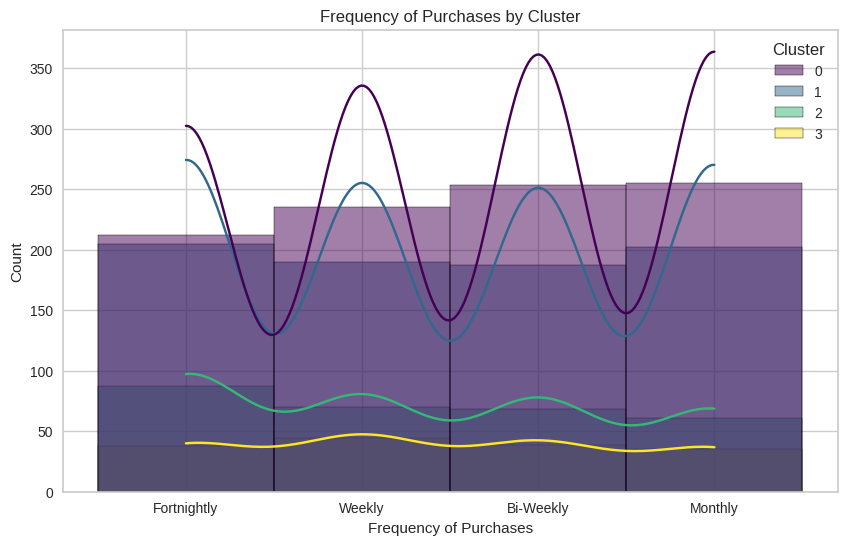

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfEDA2, x='Frequency of Purchases', hue='Cluster', kde=True, palette='viridis')
plt.title('Frequency of Purchases by Cluster')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

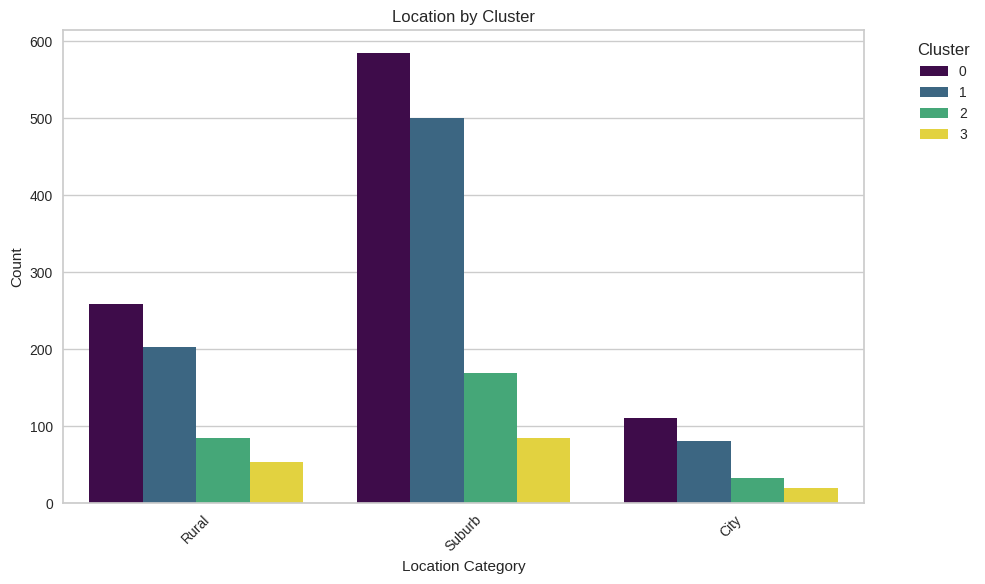

In [56]:
# Location Mapping
location_mapping = {
    'Kentucky': 'Rural',
    'Maine': 'Rural',
    'Massachusetts': 'Suburb',
    'Rhode Island': 'Suburb',
    'Oregon': 'Suburb',
    'Wyoming': 'Rural',
    'Montana': 'Rural',
    'Louisiana': 'Suburb',
    'West Virginia': 'Rural',
    'Missouri': 'Suburb',
    'Arkansas': 'Suburb',
    'Hawaii': 'Rural',
    'Delaware': 'Suburb',
    'New Hampshire': 'Rural',
    'New York': 'City',
    'Alabama': 'Suburb',
    'Mississippi': 'Suburb',
    'North Carolina': 'Suburb',
    'California': 'City',
    'Oklahoma': 'Suburb',
    'Florida': 'City',
    'Texas': 'City',
    'Nevada': 'Suburb',
    'Kansas': 'Suburb',
    'Colorado': 'Suburb',
    'North Dakota': 'Rural',
    'Illinois': 'City',
    'Indiana': 'Suburb',
    'Arizona': 'Suburb',
    'Alaska': 'Rural',
    'Tennessee': 'Suburb',
    'Ohio': 'Suburb',
    'New Jersey': 'Suburb',
    'Maryland': 'Suburb',
    'Vermont': 'Rural',
    'New Mexico': 'Suburb',
    'South Carolina': 'Suburb',
    'Idaho': 'Rural',
    'Pennsylvania': 'Suburb',
    'Connecticut': 'Suburb',
    'Utah': 'Suburb',
    'Virginia': 'Suburb',
    'Georgia': 'Suburb',
    'Nebraska': 'Rural',
    'Iowa': 'Rural',
    'South Dakota': 'Rural',
    'Minnesota': 'Suburb',
    'Washington': 'Suburb',
    'Wisconsin': 'Suburb',
    'Michigan': 'Suburb'
}


# Adding Location_Category column to DataFrame
dfEDA2['Location Category'] = dfEDA2['Location'].map(location_mapping)


# Plotting Location Category by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Location Category', hue='Cluster', data=dfEDA2, palette='viridis')
plt.title('Location by Cluster')
plt.xlabel('Location Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

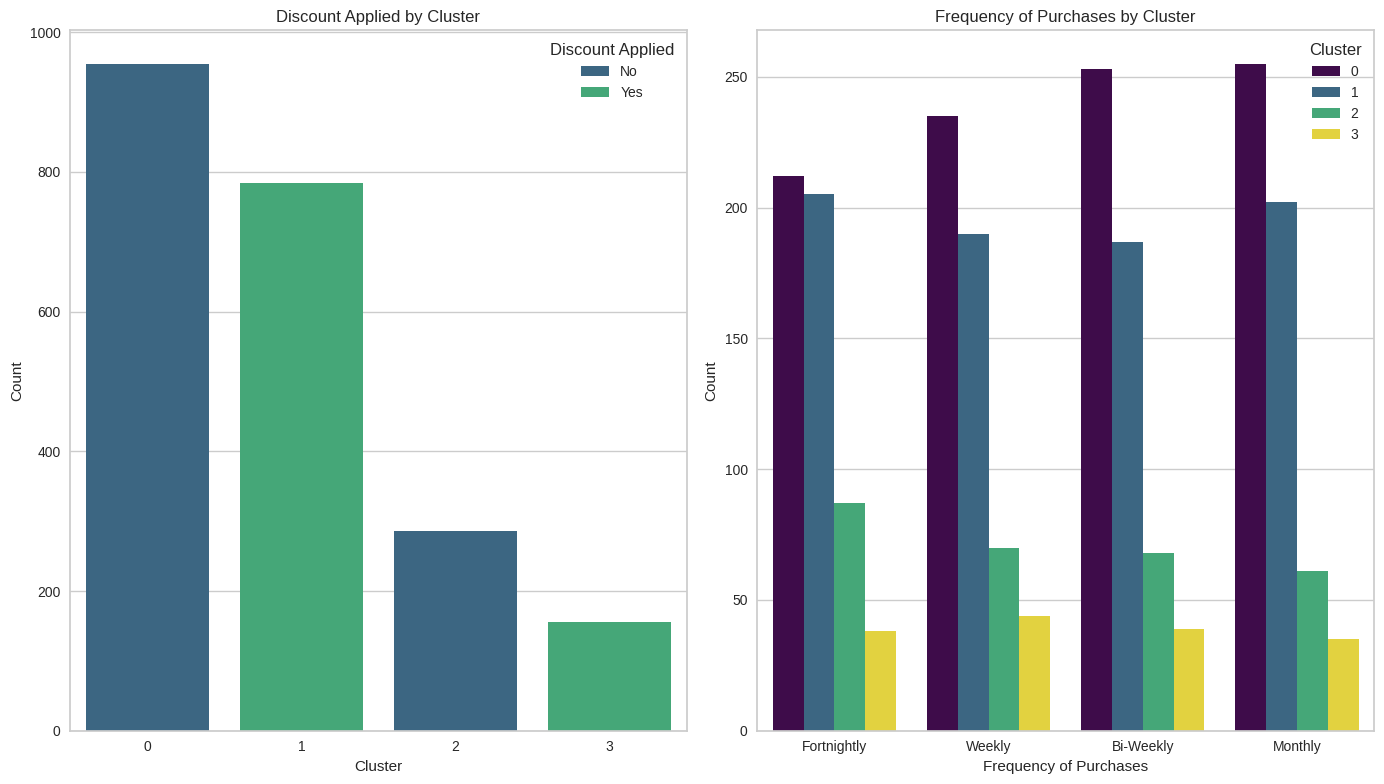

In [57]:
# Membuat plot untuk menganalisis ciri-ciri klaster
plt.figure(figsize=(14, 8))

# Menganalisis proporsi penggunaan diskon dalam setiap klaster
plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', hue='Discount Applied', data=dfEDA2, palette='viridis')
plt.title('Discount Applied by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Discount Applied', loc='upper right')

# Menganalisis distribusi frekuensi pembelian dalam setiap klaster
plt.subplot(1, 2, 2)
sns.countplot(x='Frequency of Purchases', hue='Cluster', data=dfEDA2, palette='viridis', order=['Fortnightly', 'Weekly', 'Bi-Weekly', 'Monthly'])
plt.title('Frequency of Purchases by Cluster')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

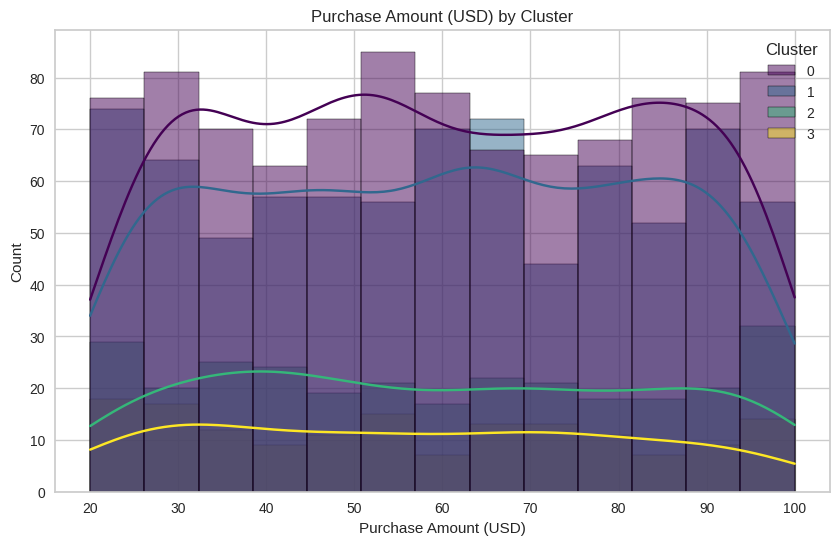

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfEDA2, x='Purchase Amount (USD)', hue='Cluster', kde=True, palette='viridis')
plt.title('Purchase Amount (USD) by Cluster')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

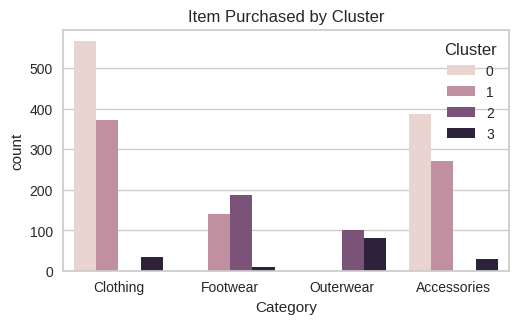

In [59]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 3)
sns.countplot(x='Category', hue='Cluster', data=dfEDA2)
plt.title('Item Purchased by Cluster')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

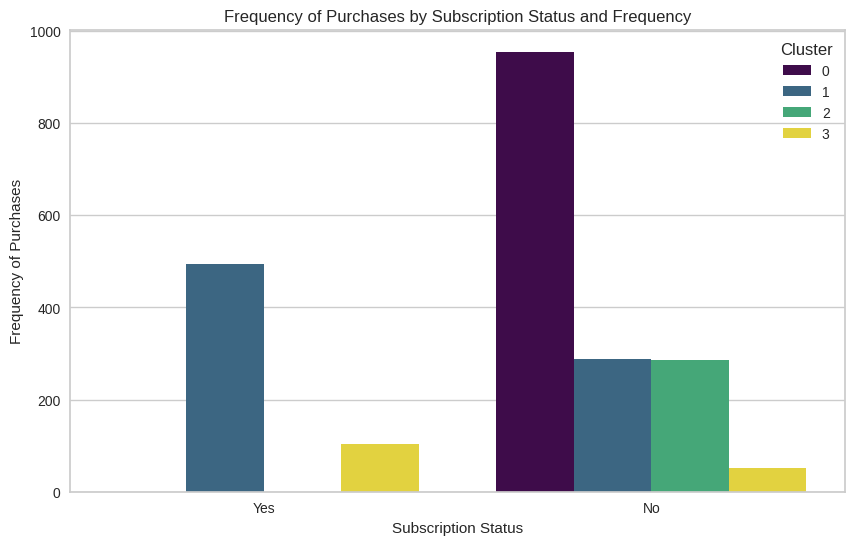

In [60]:
# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Status', hue='Cluster', data=dfEDA2, palette='viridis')
plt.title('Frequency of Purchases by Subscription Status and Frequency')
plt.xlabel('Subscription Status')
plt.ylabel('Frequency of Purchases')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

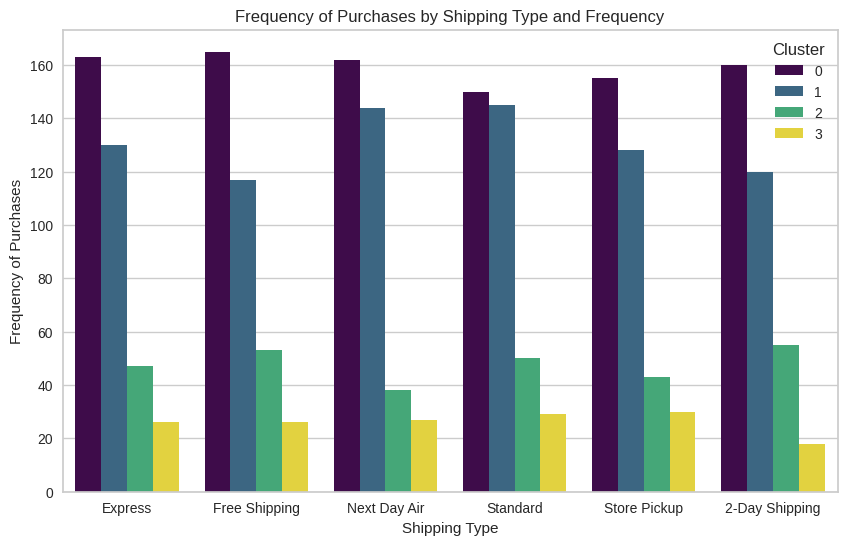

In [61]:
# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Type', hue='Cluster', data=dfEDA2, palette='viridis')
plt.title('Frequency of Purchases by Shipping Type and Frequency')
plt.xlabel('Shipping Type')
plt.ylabel('Frequency of Purchases')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

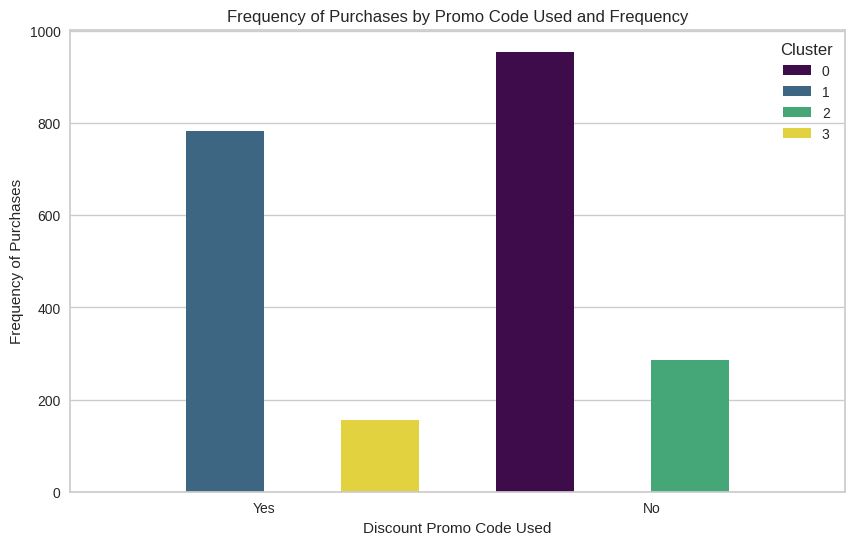

In [62]:
# Buat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo Code Used', hue='Cluster', data=dfEDA2, palette='viridis')
plt.title('Frequency of Purchases by Promo Code Used and Frequency')
plt.xlabel('Discount Promo Code Used')
plt.ylabel('Frequency of Purchases')
plt.show()


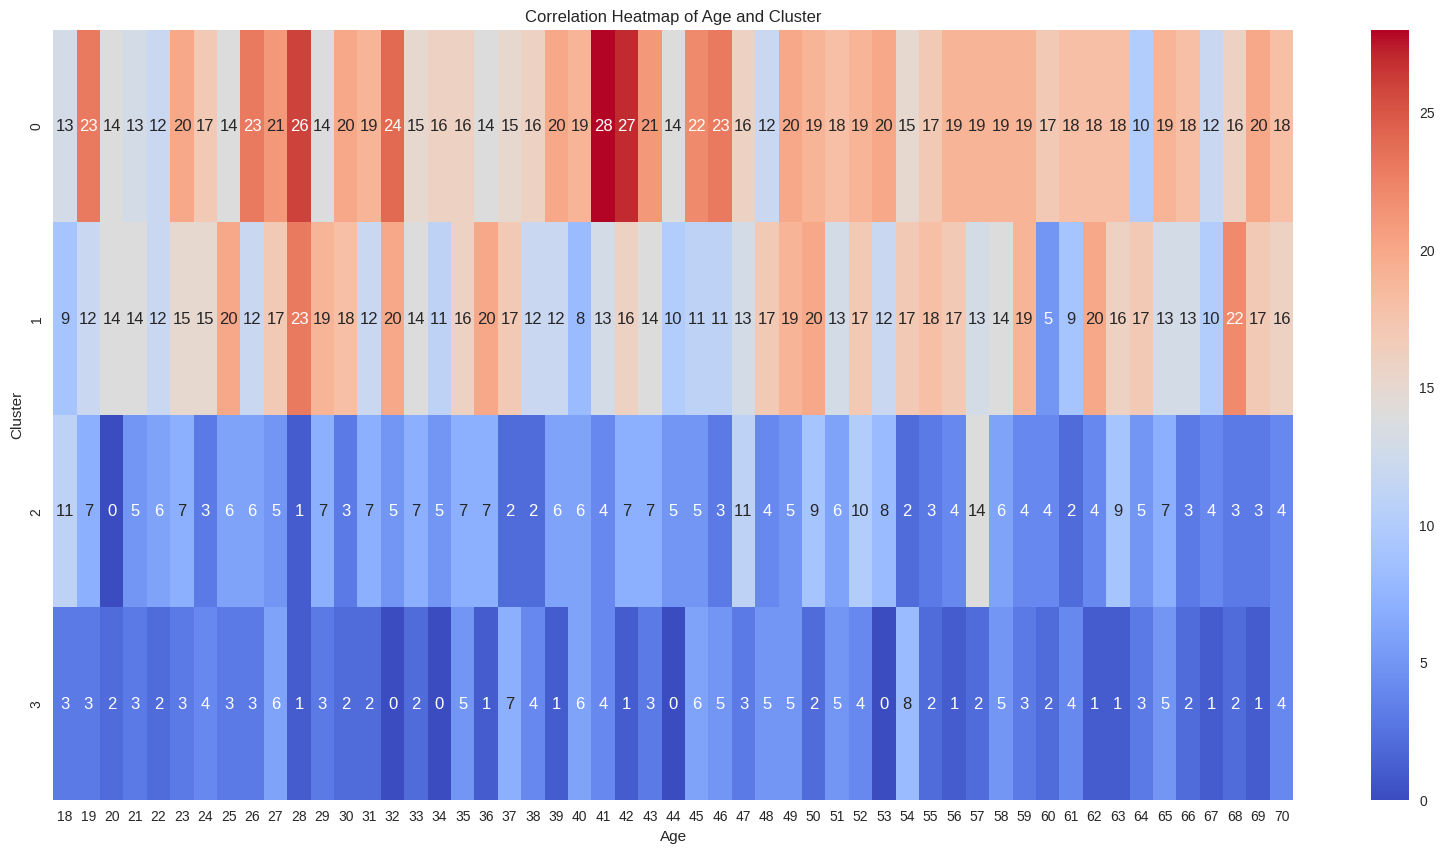

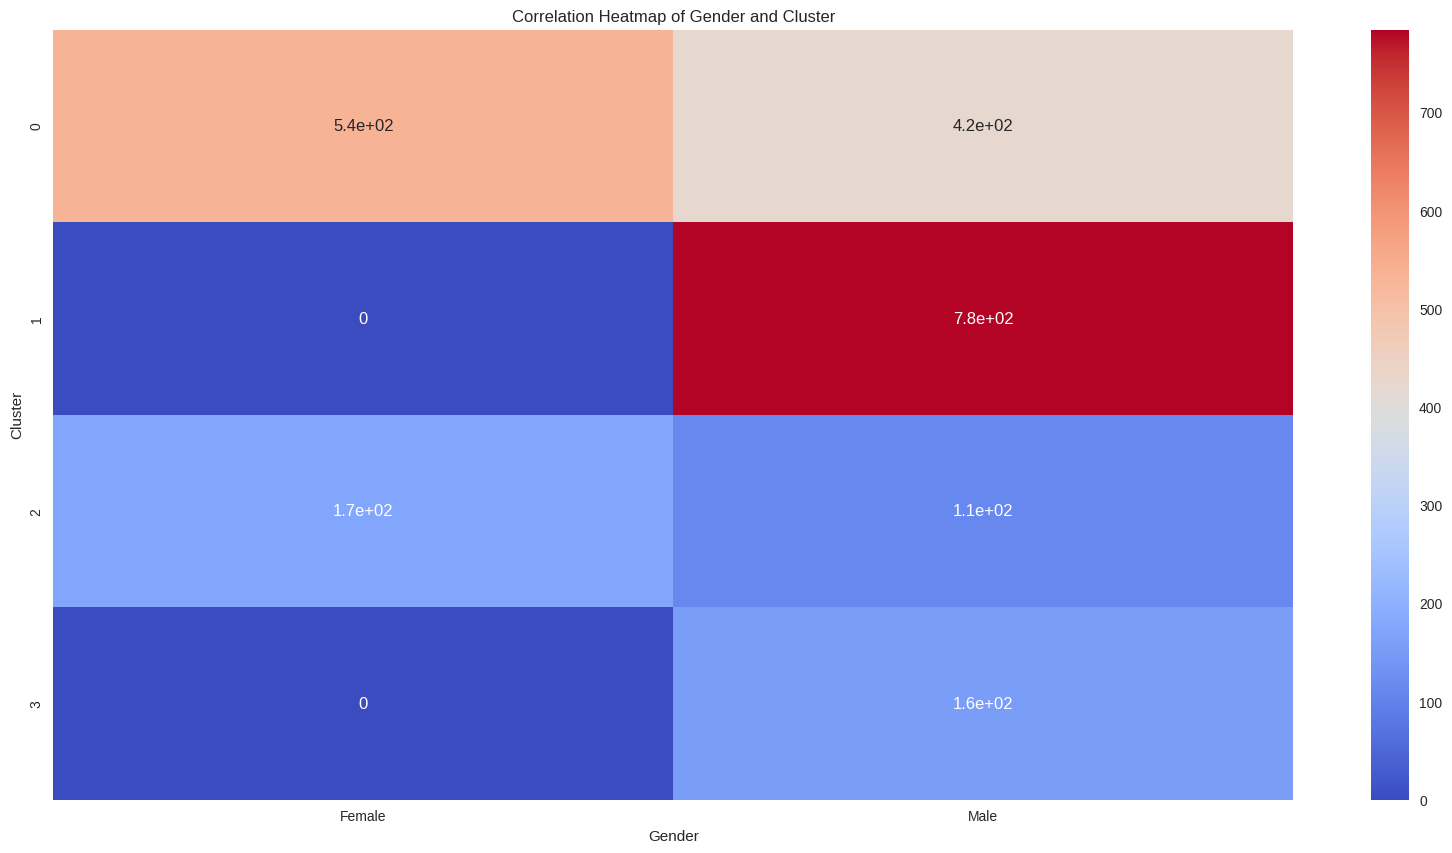

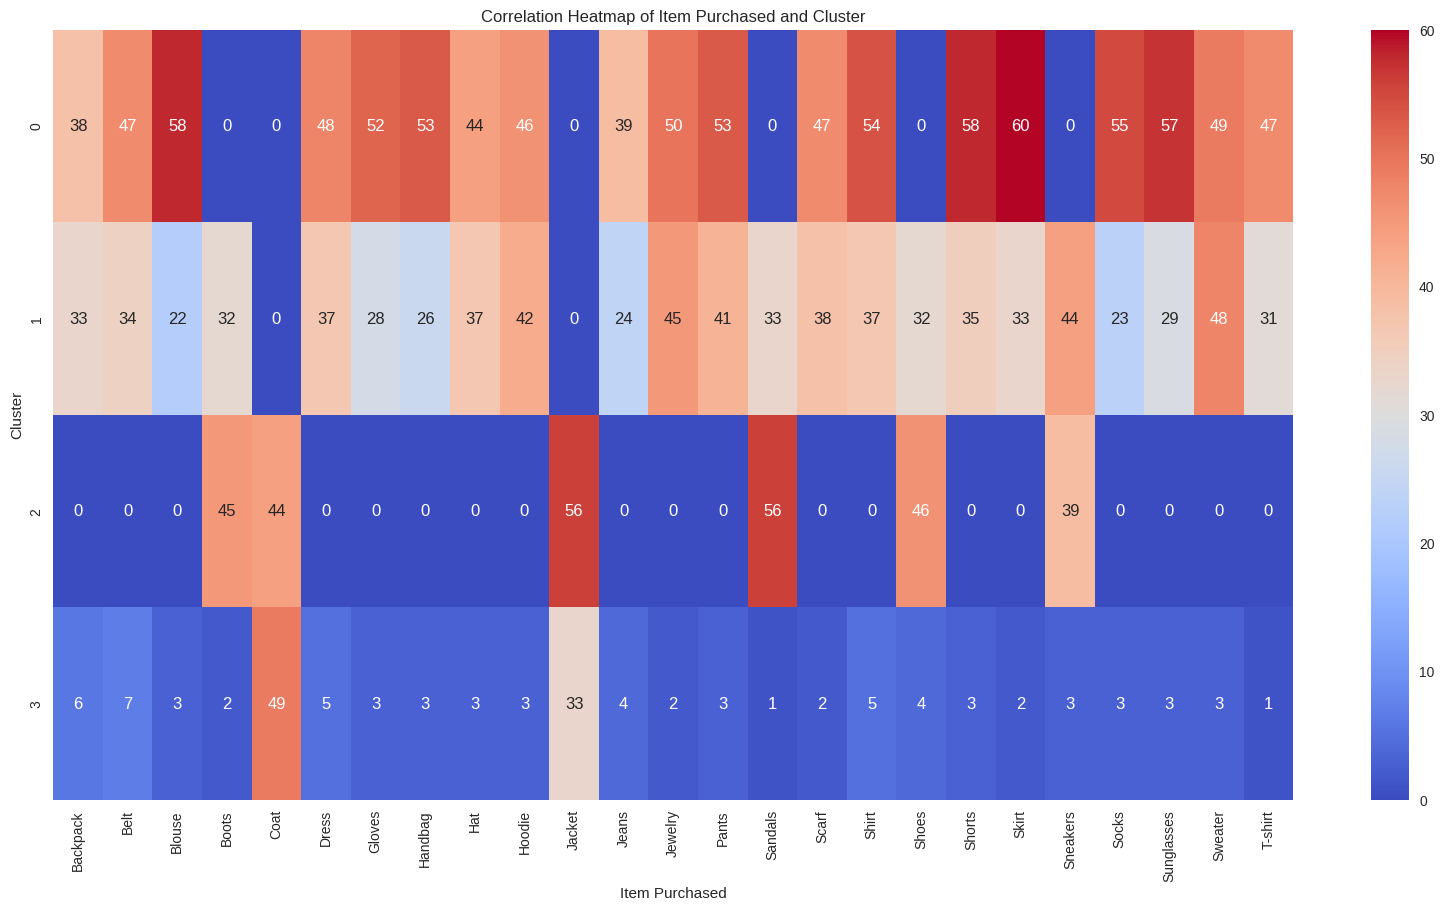

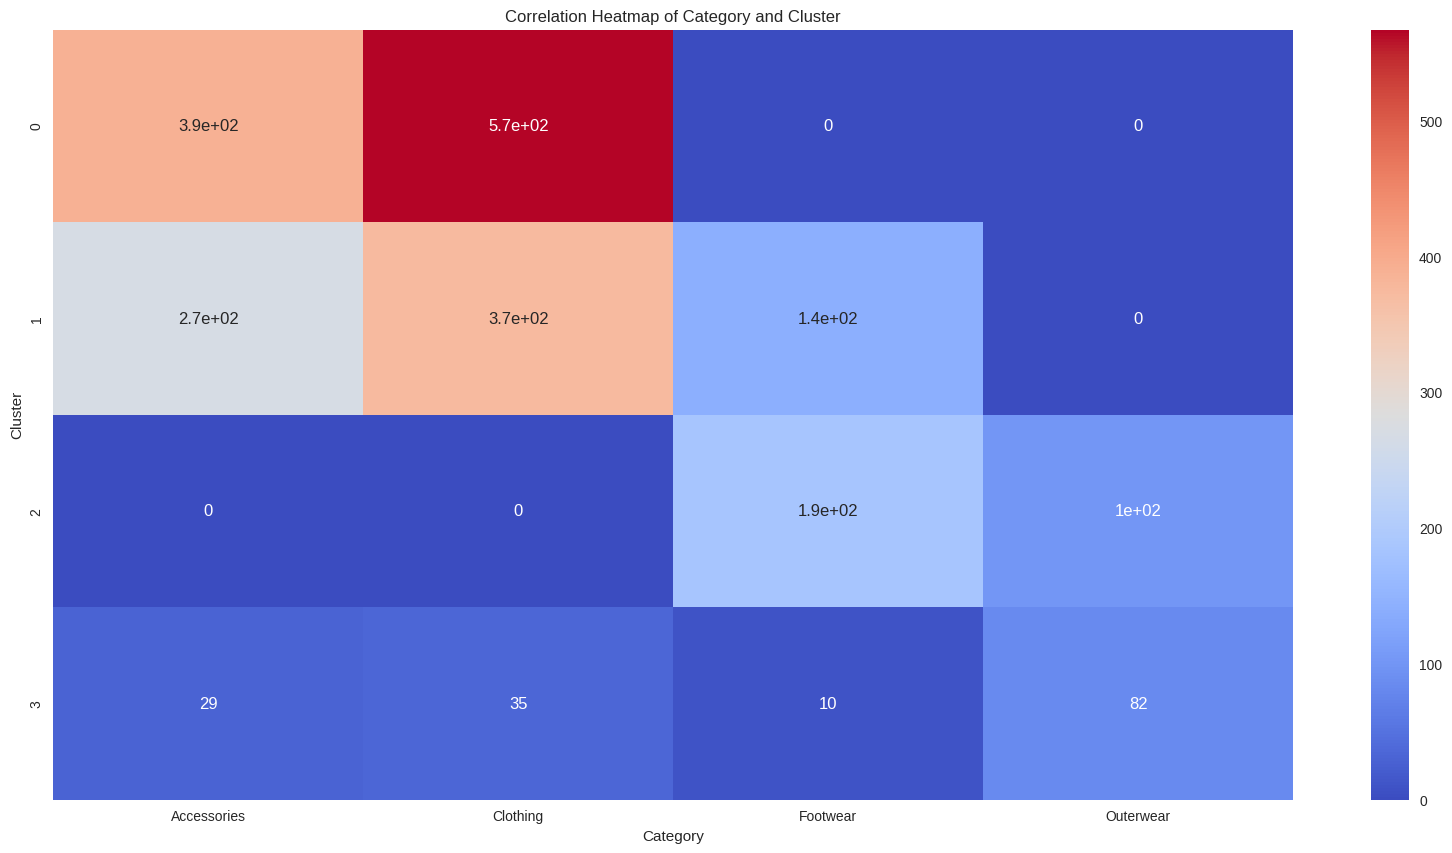

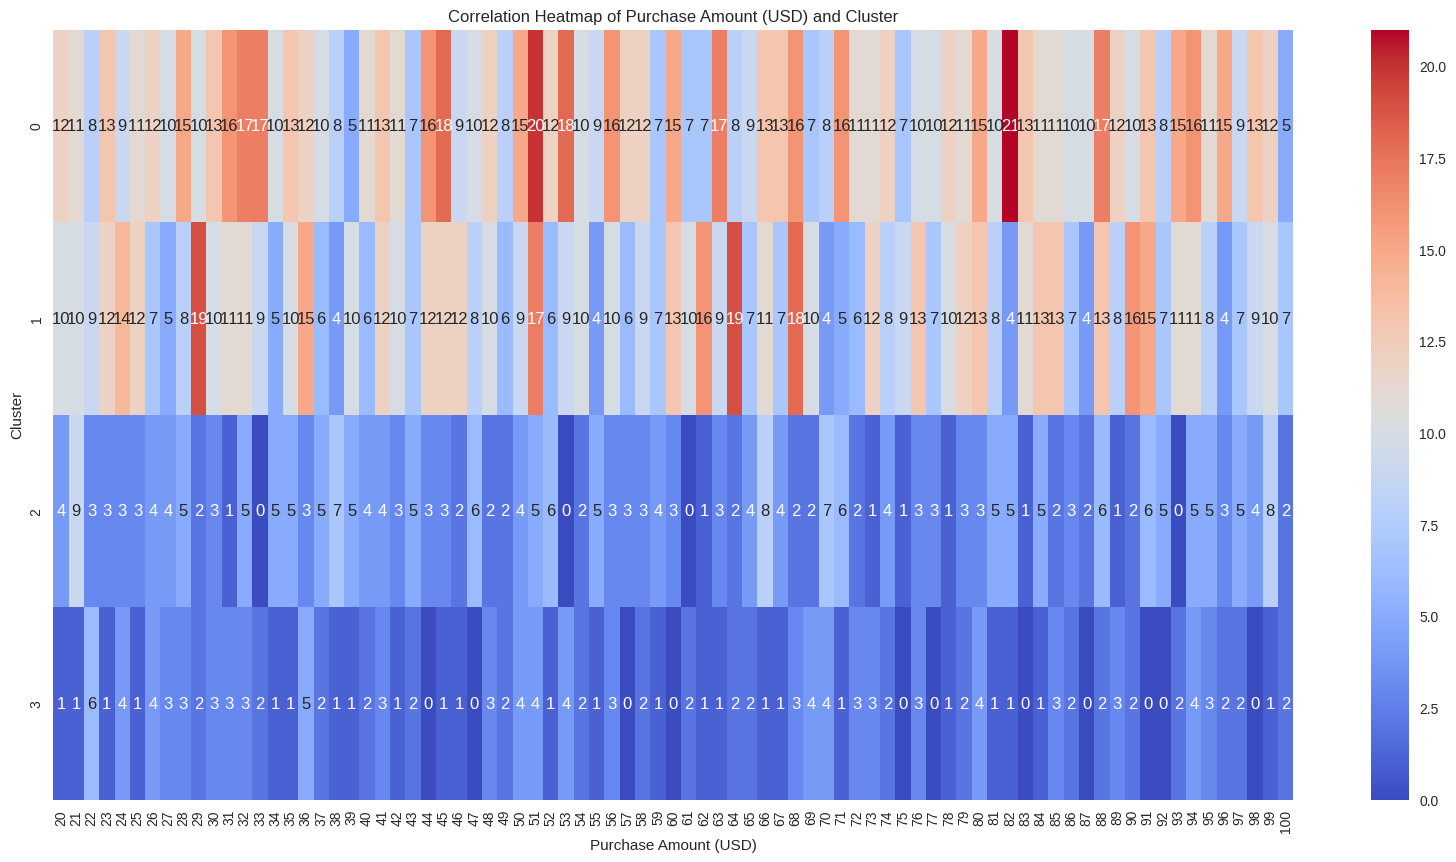

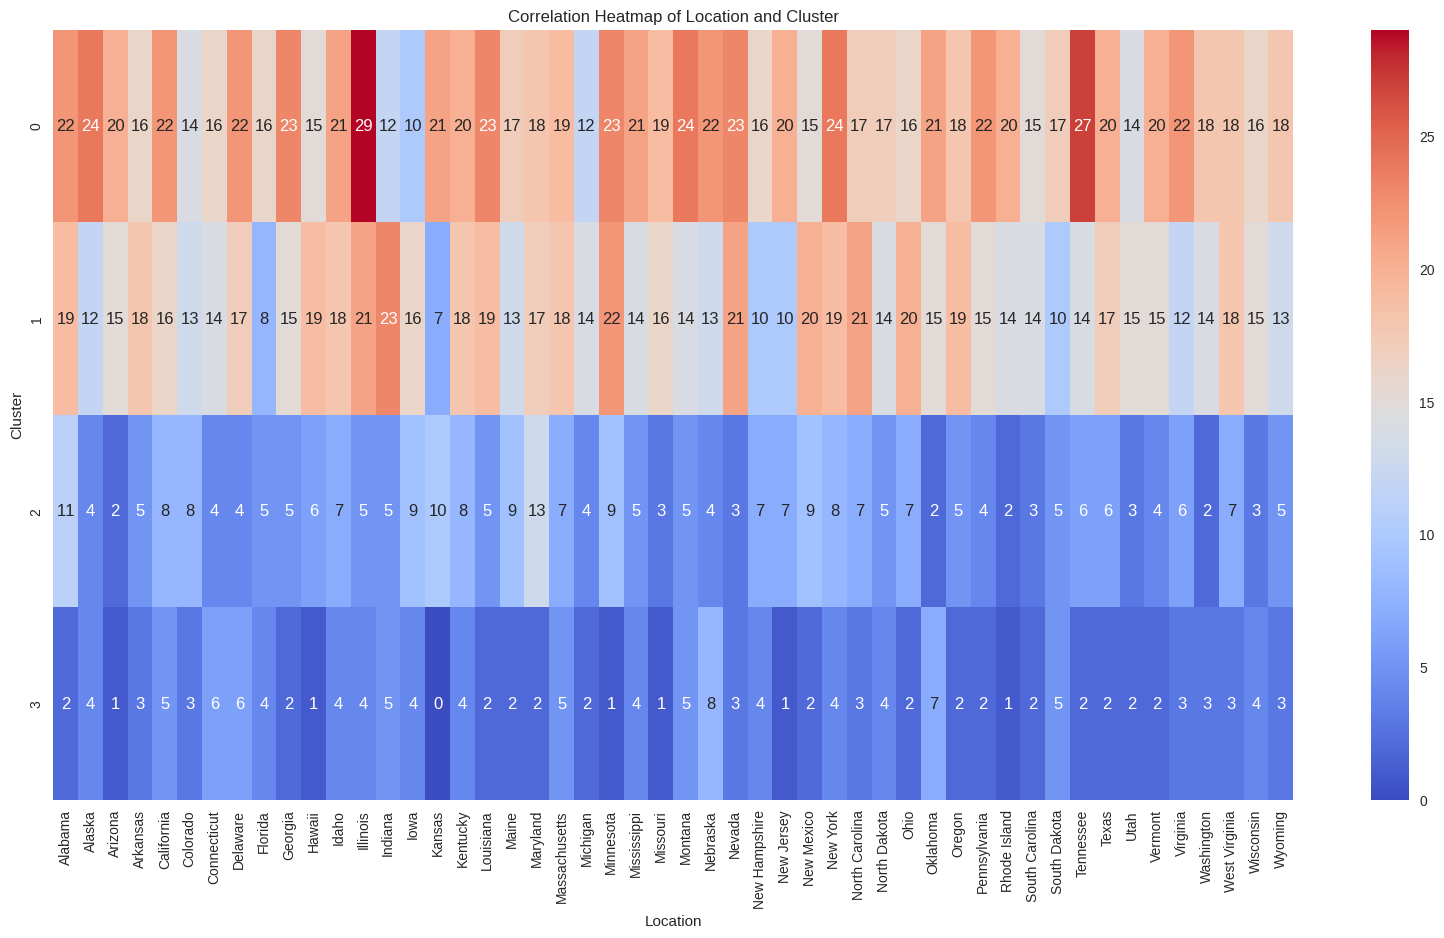

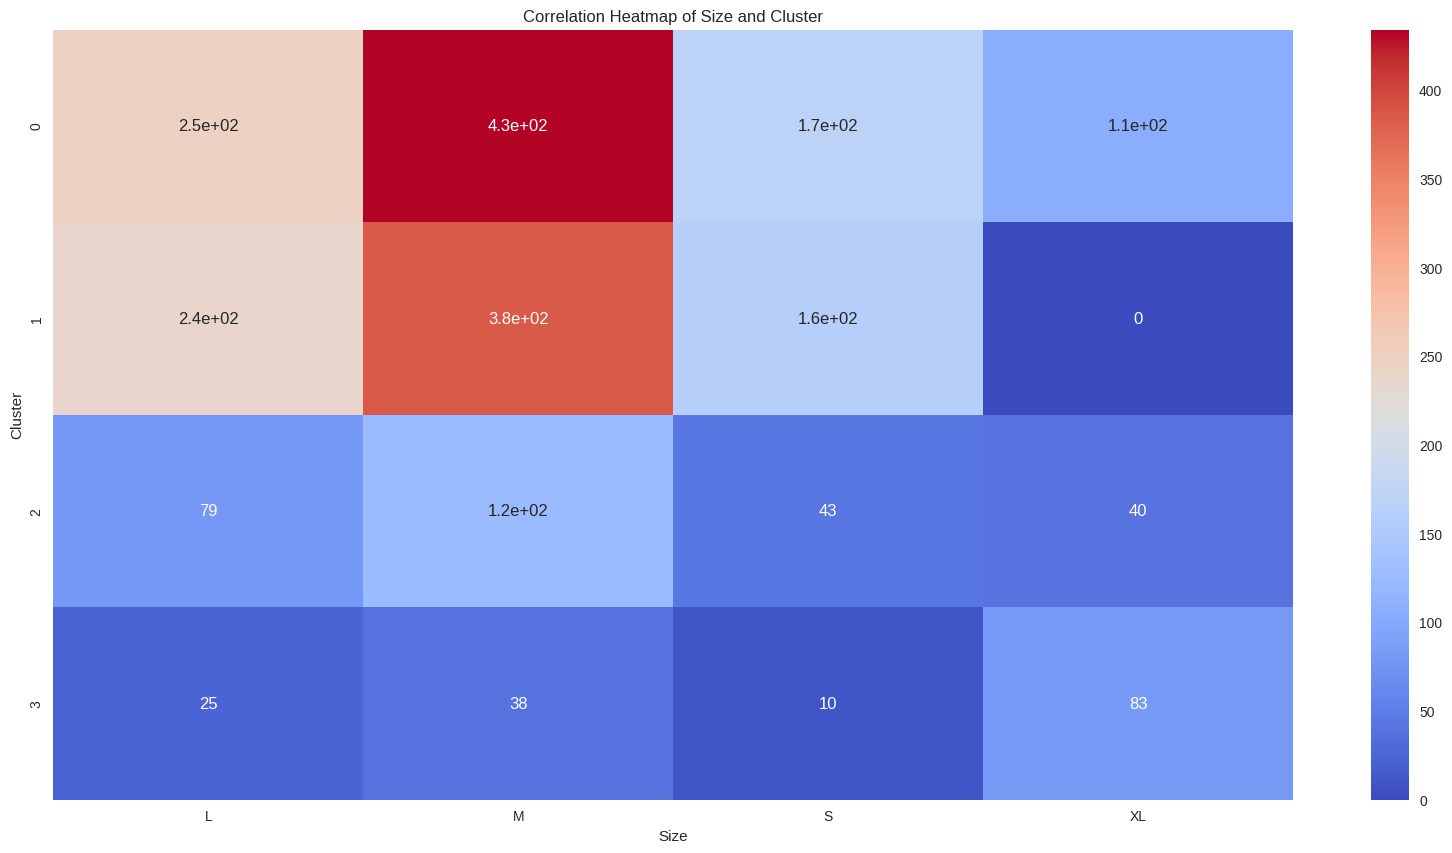

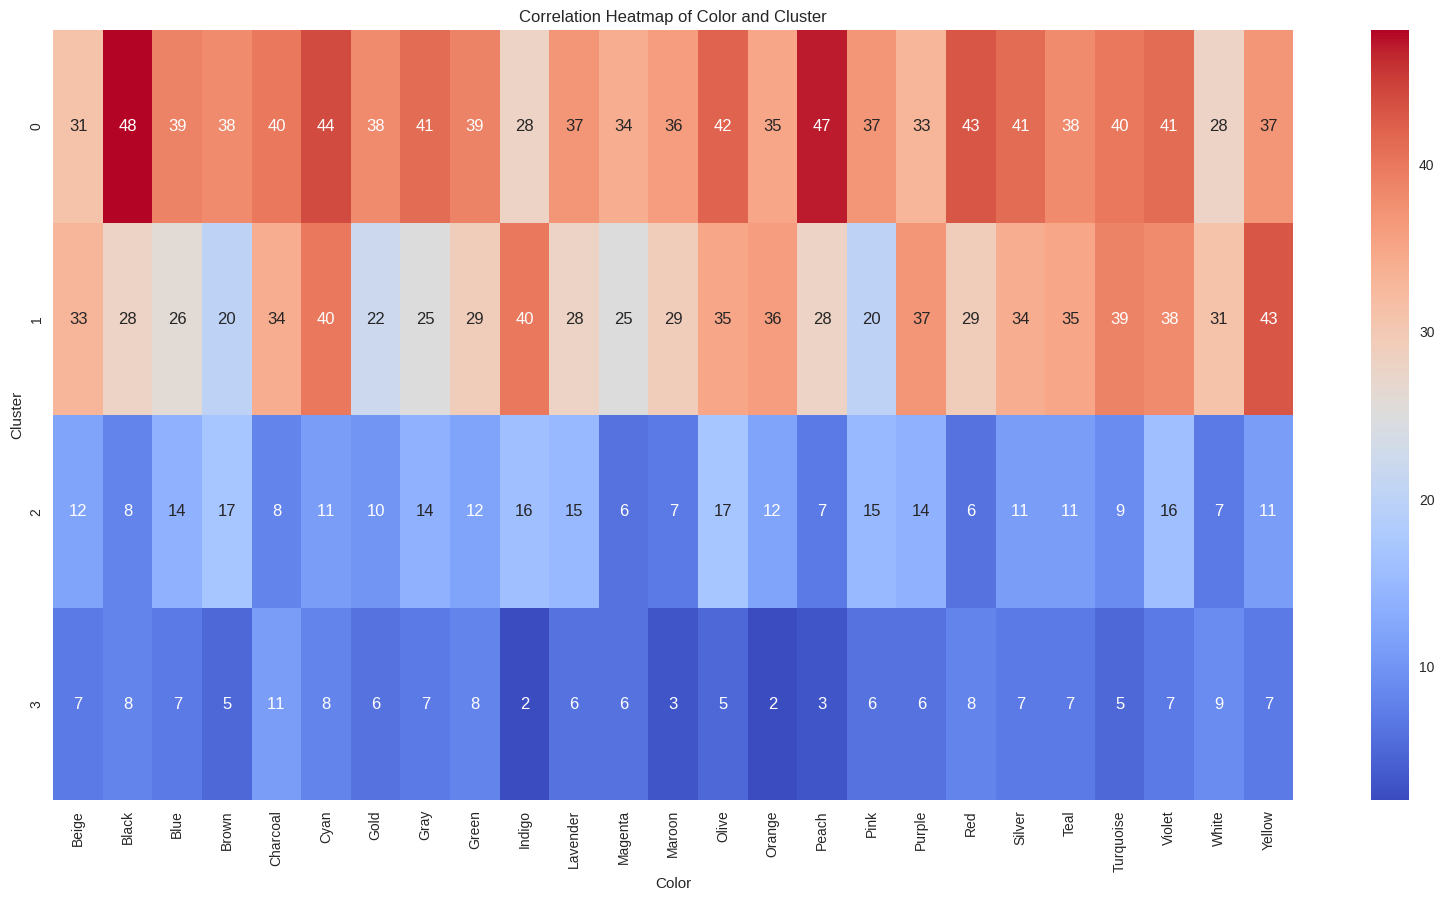

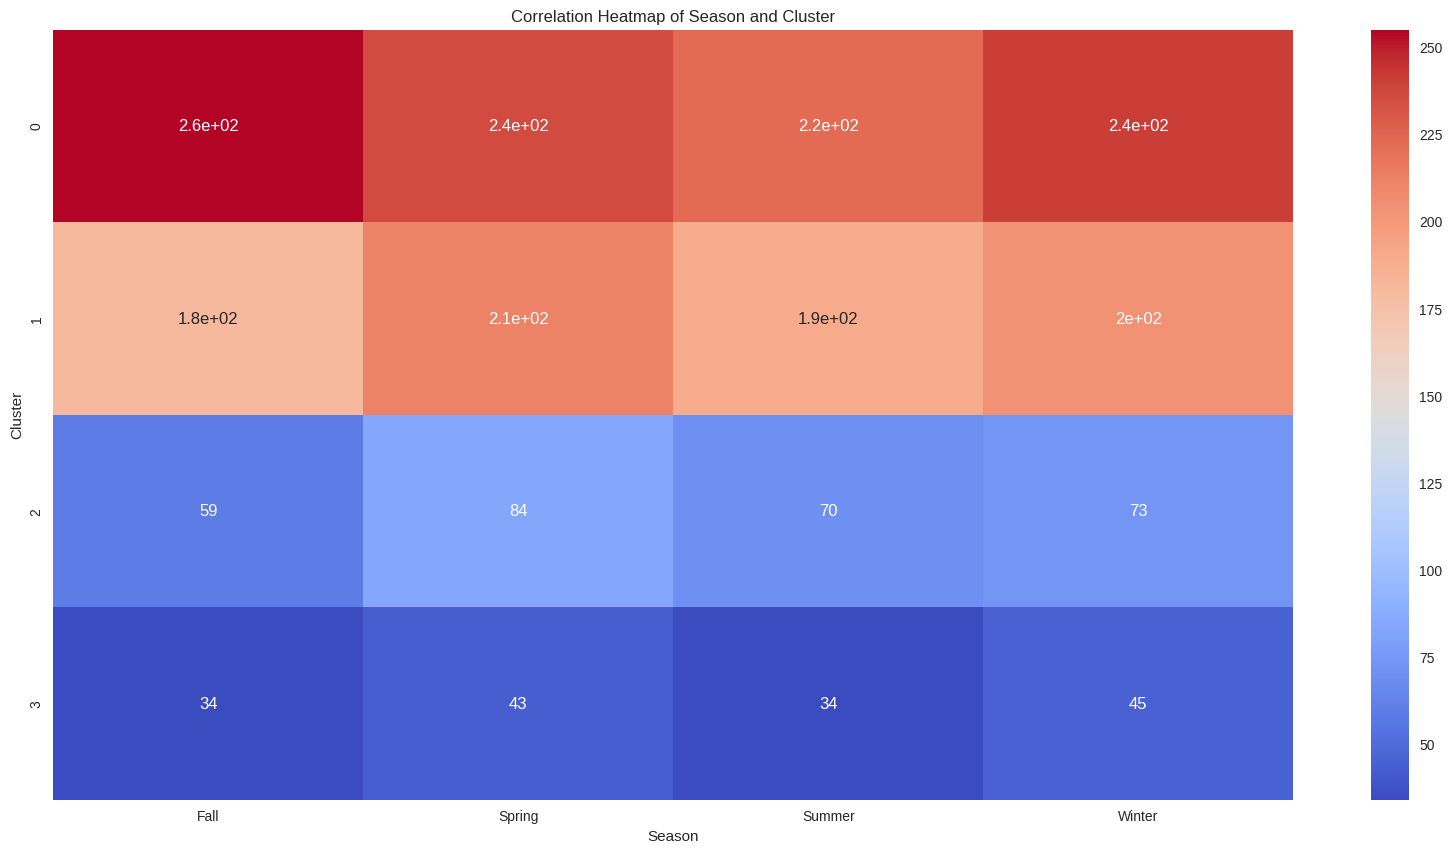

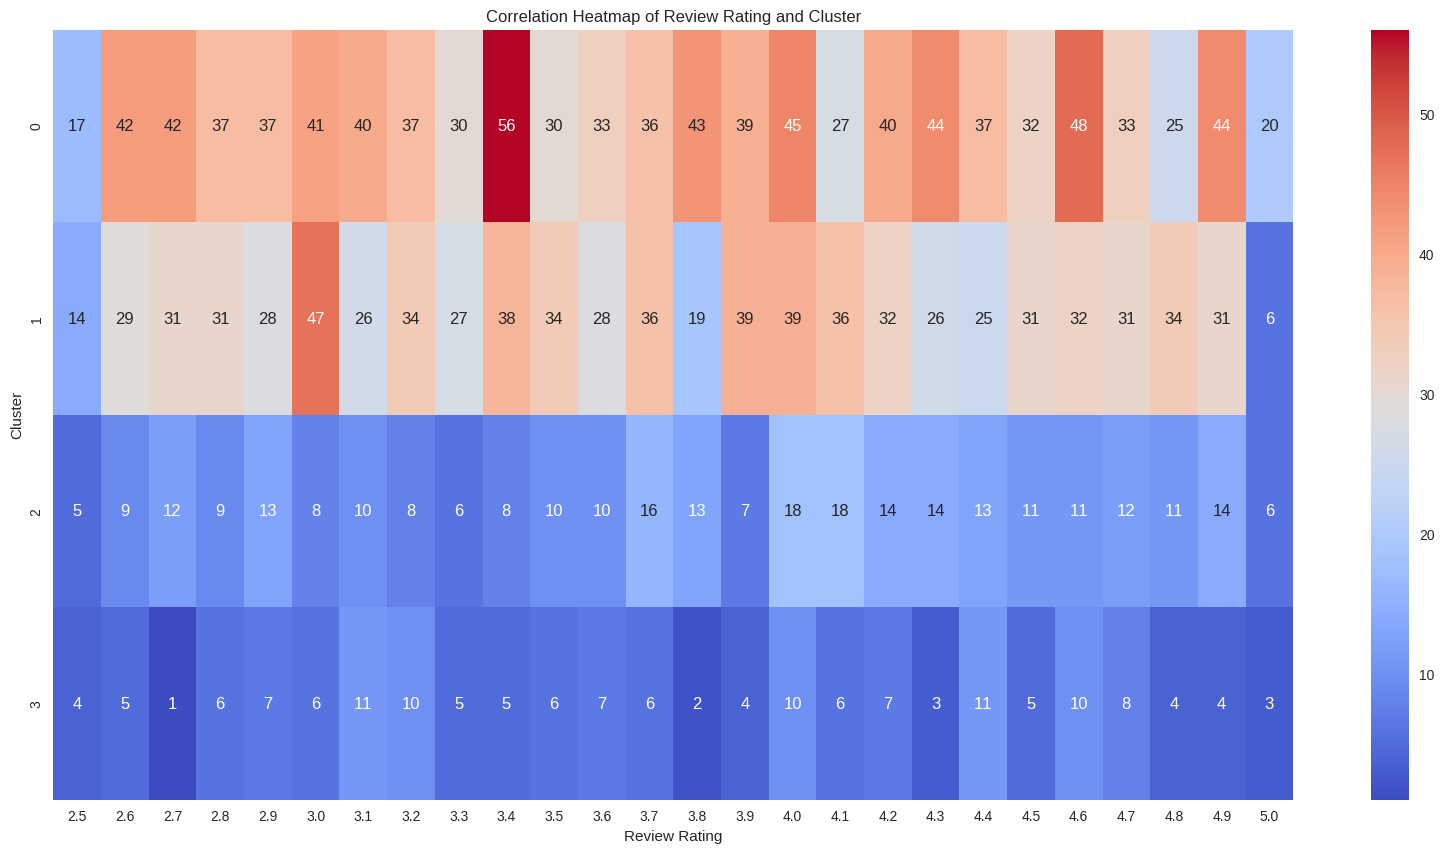

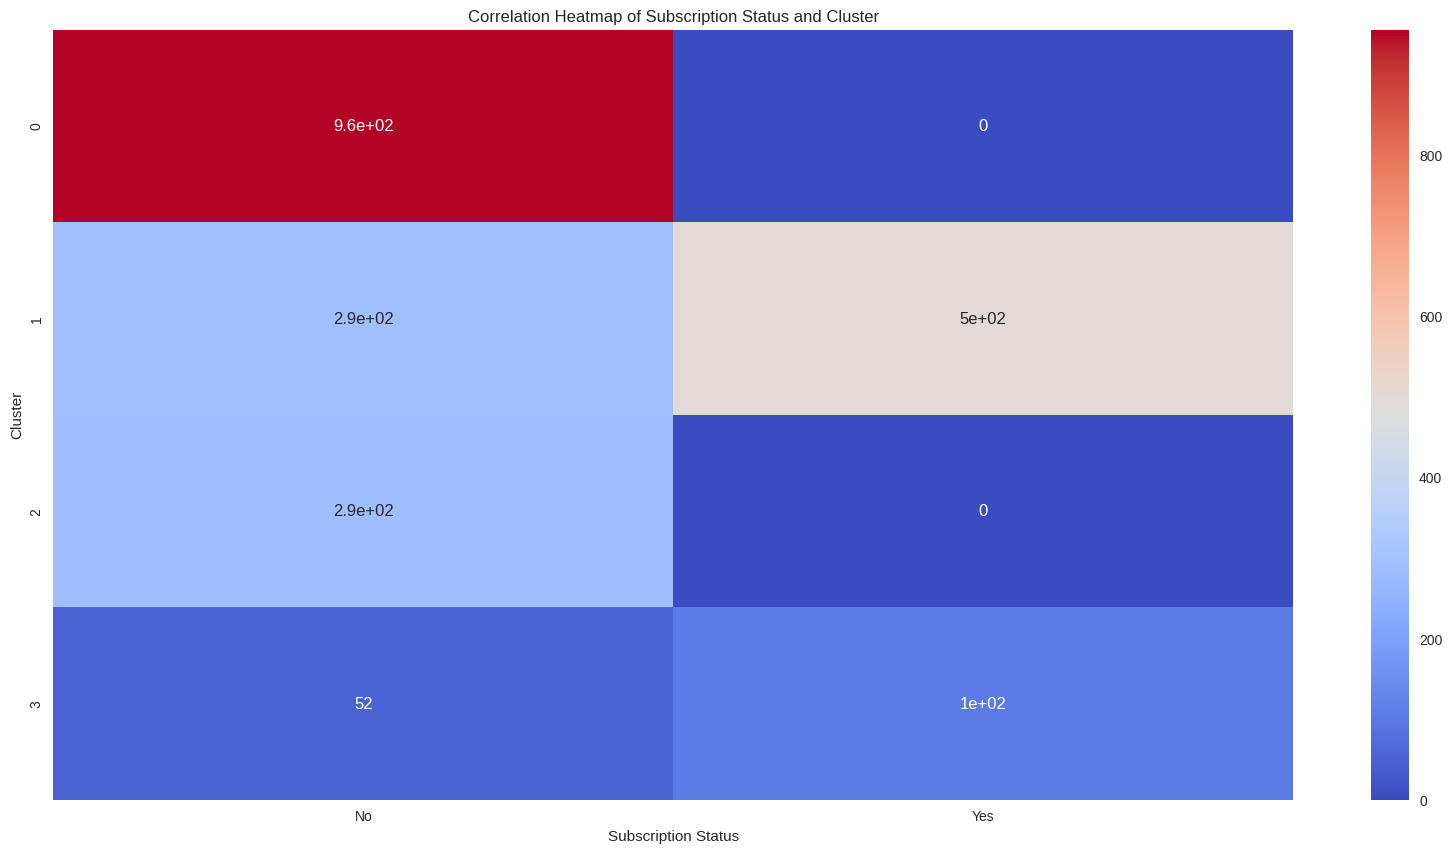

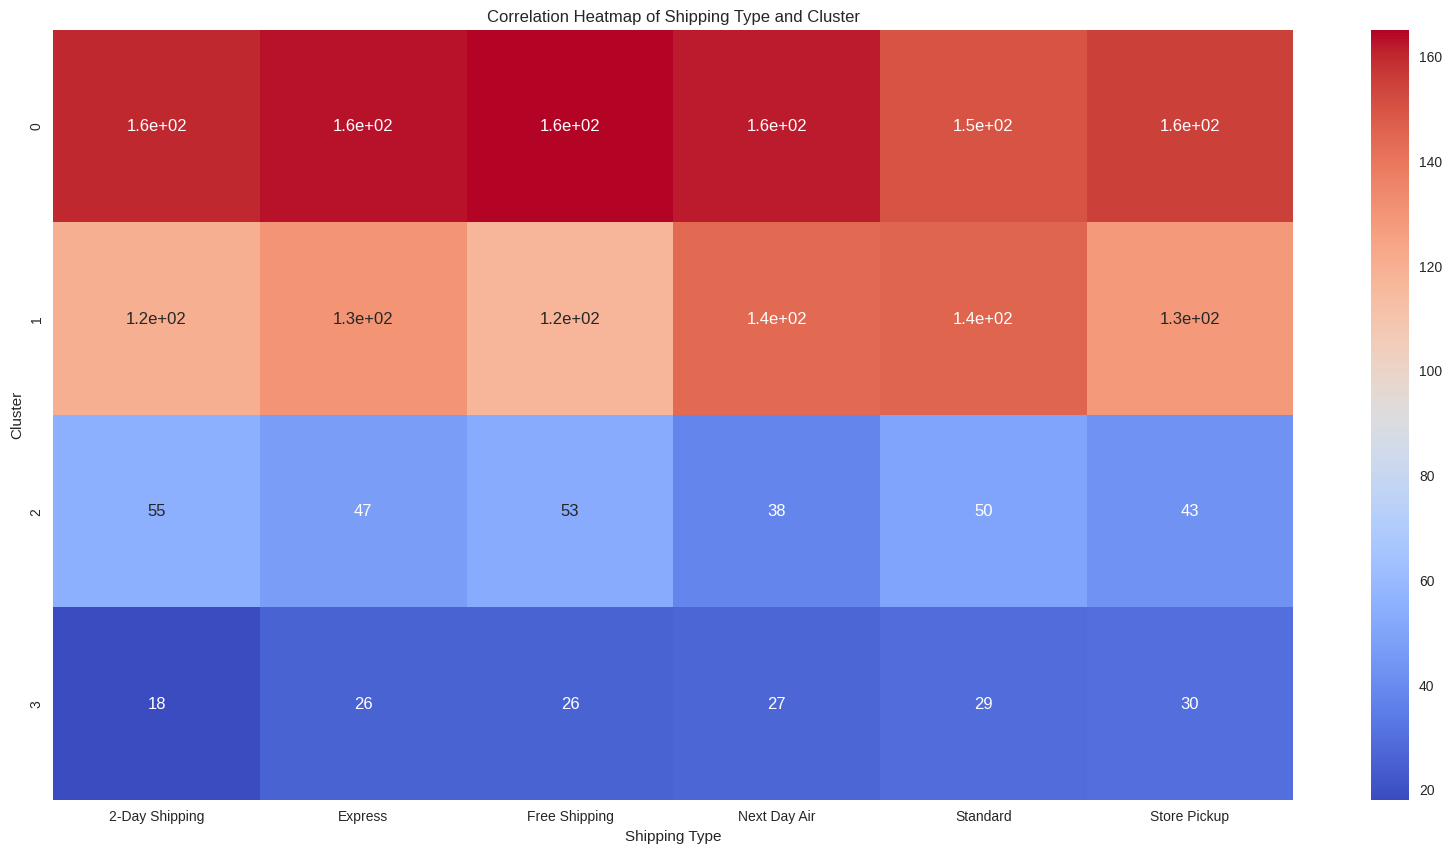

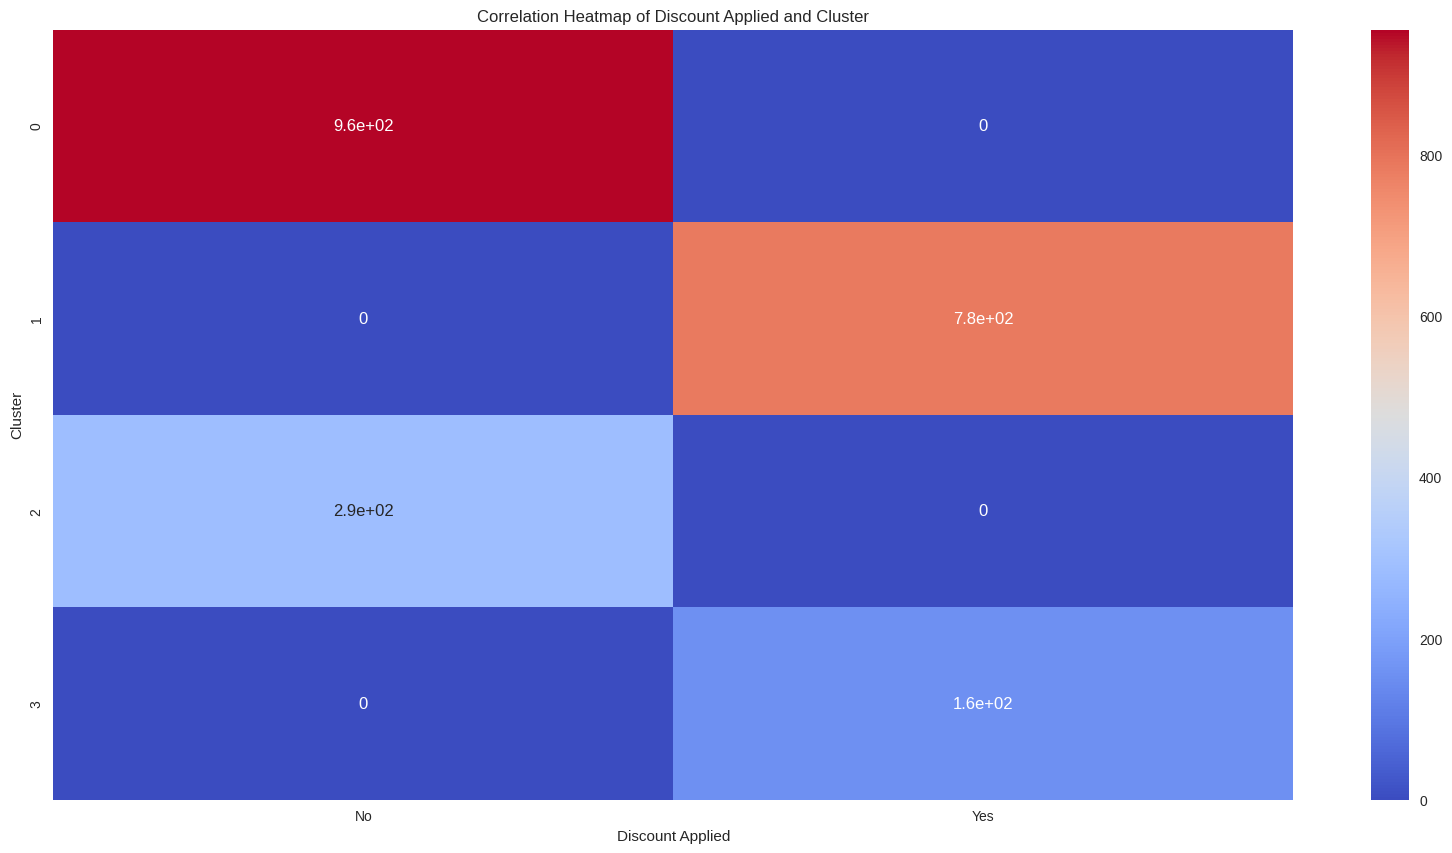

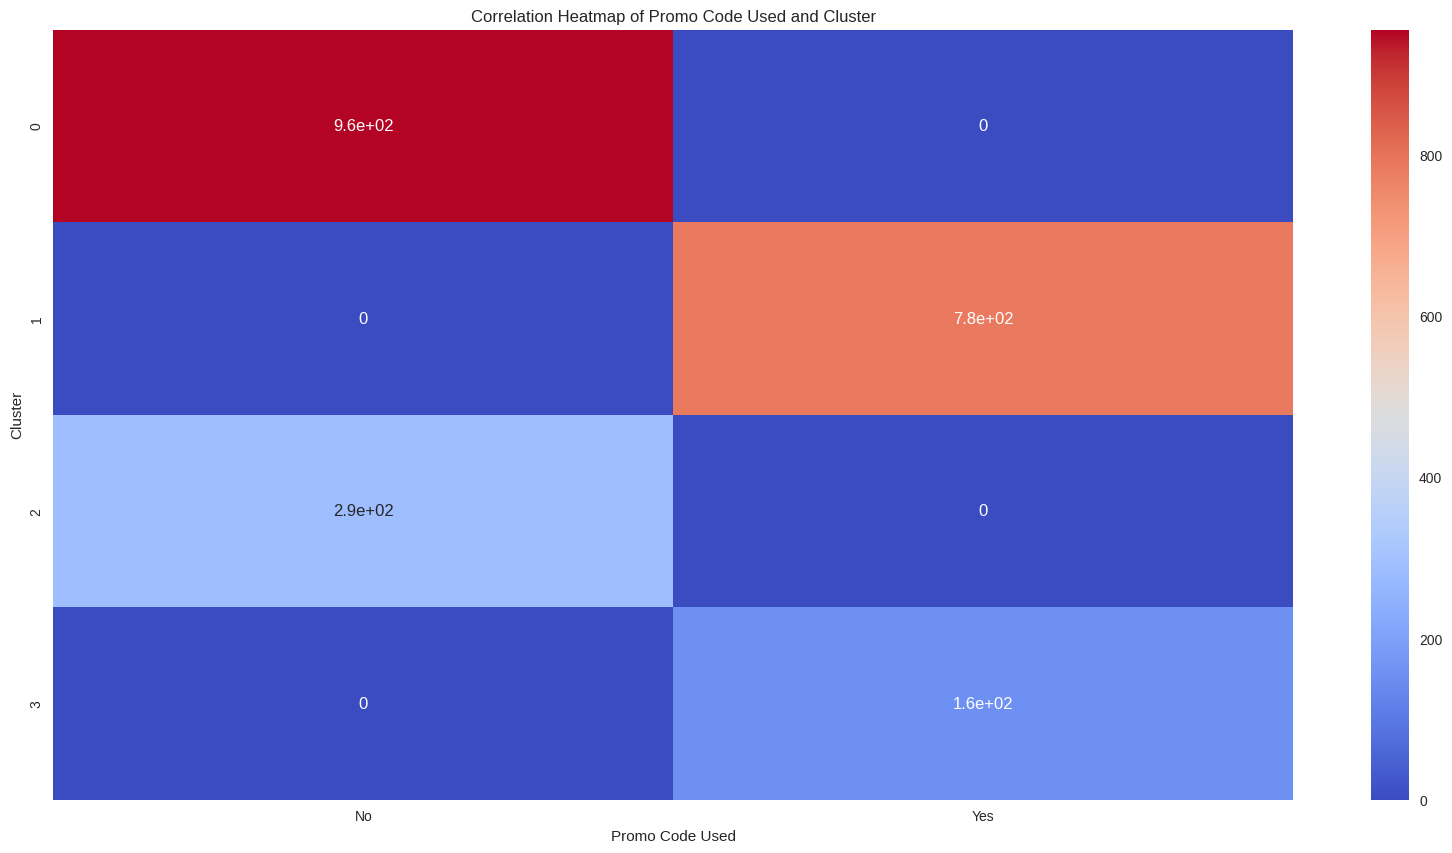

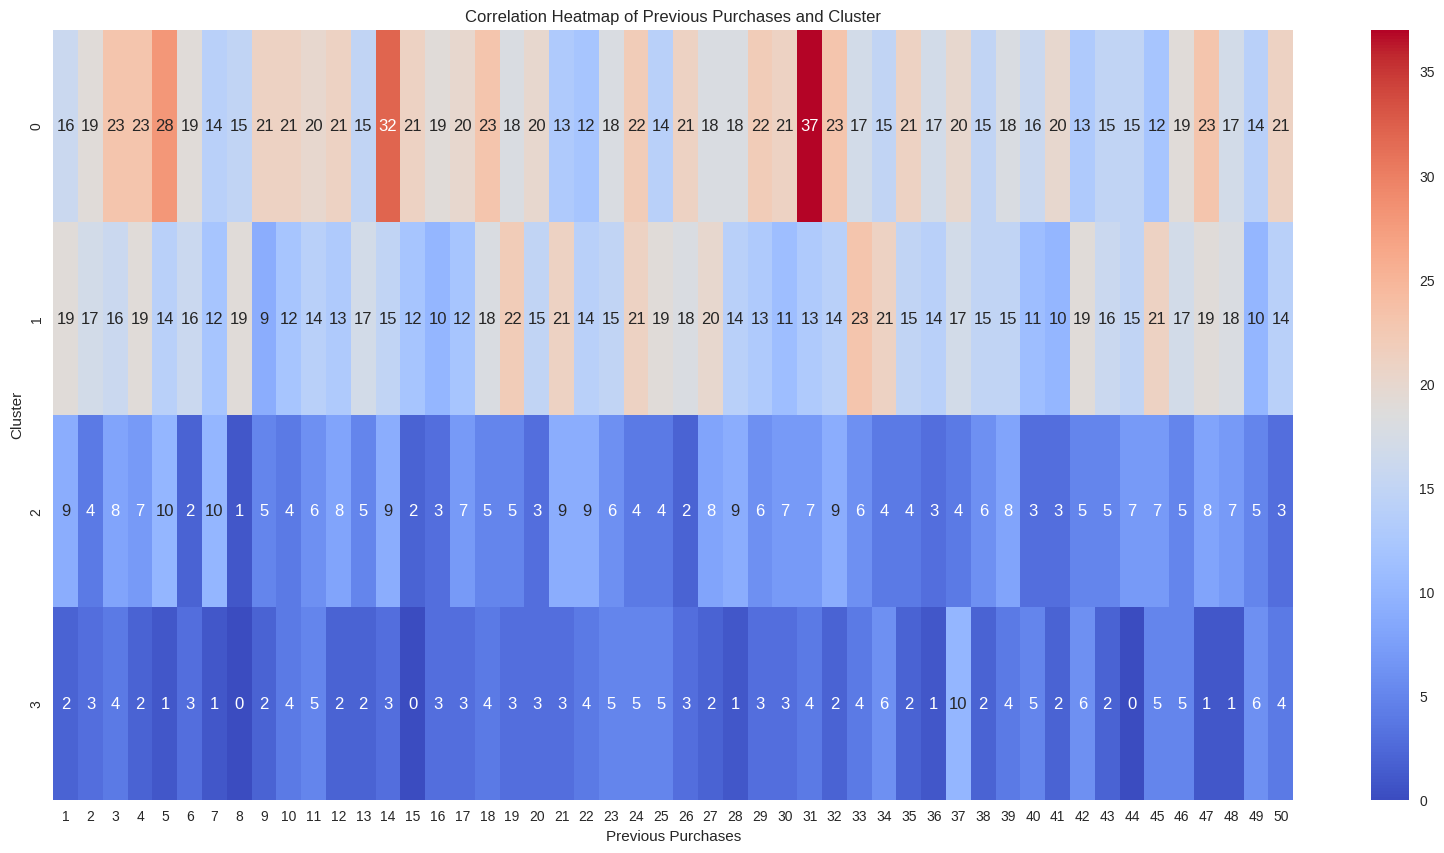

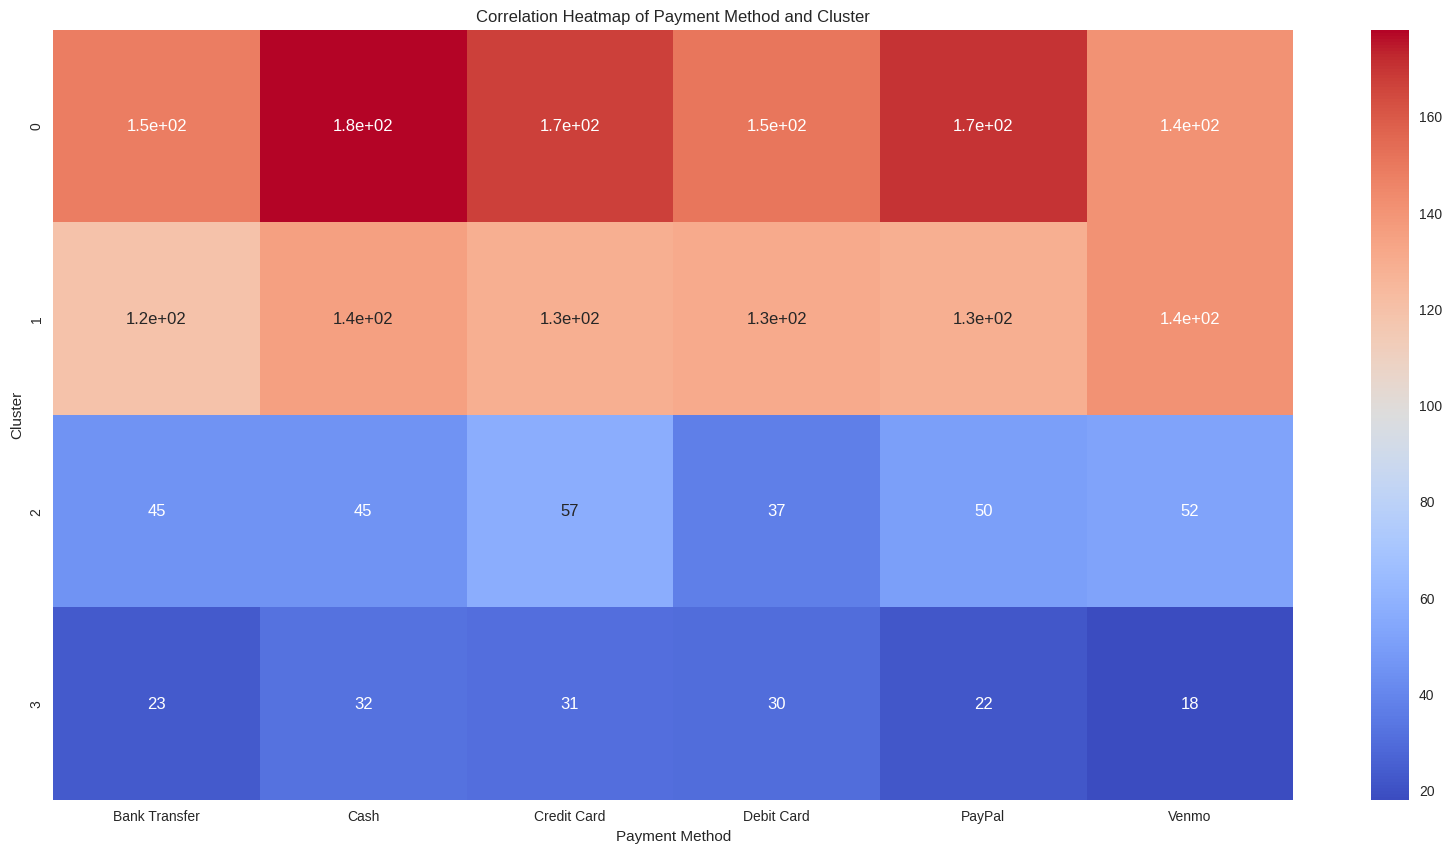

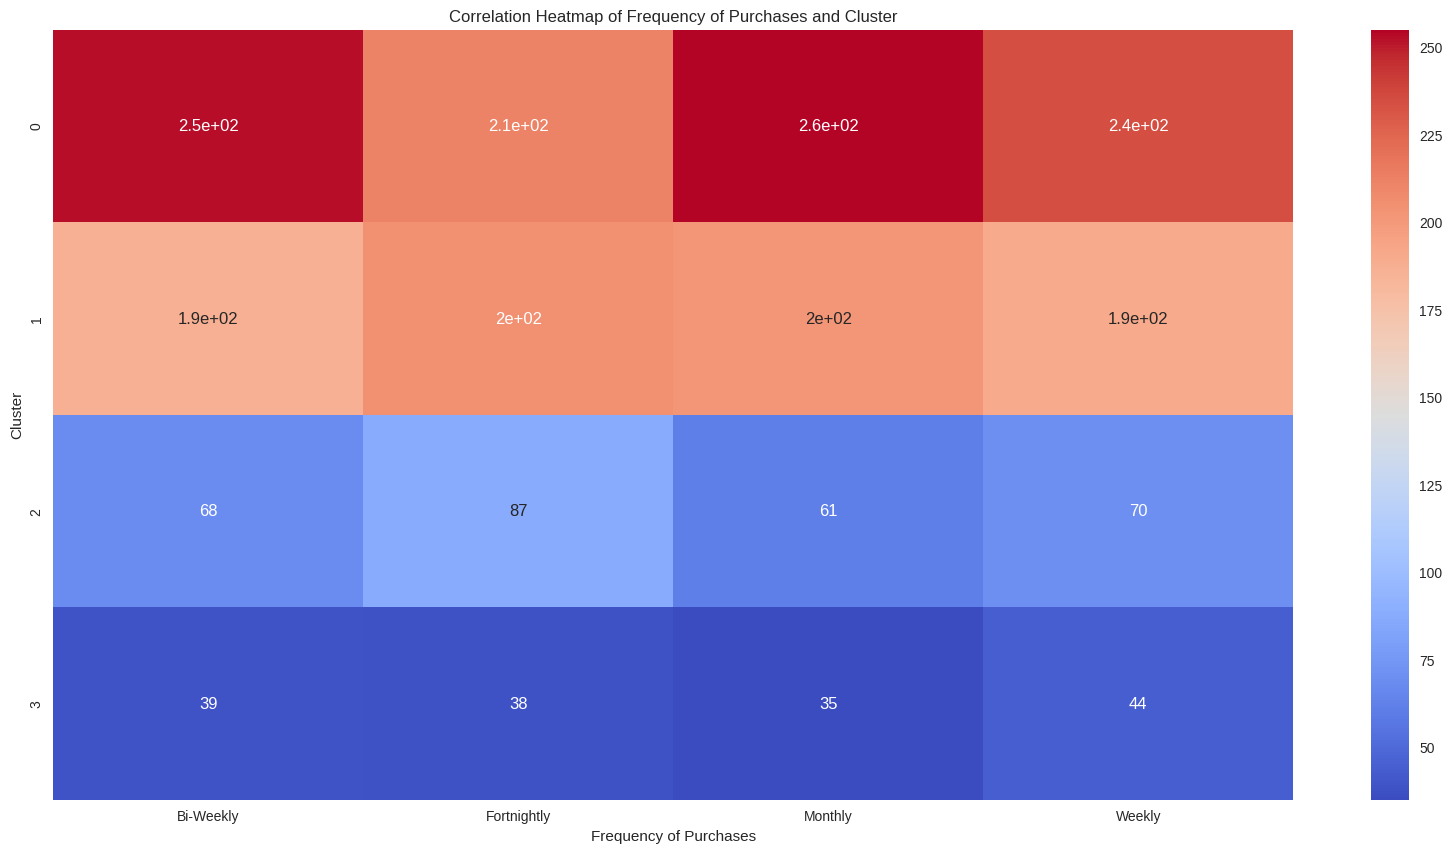

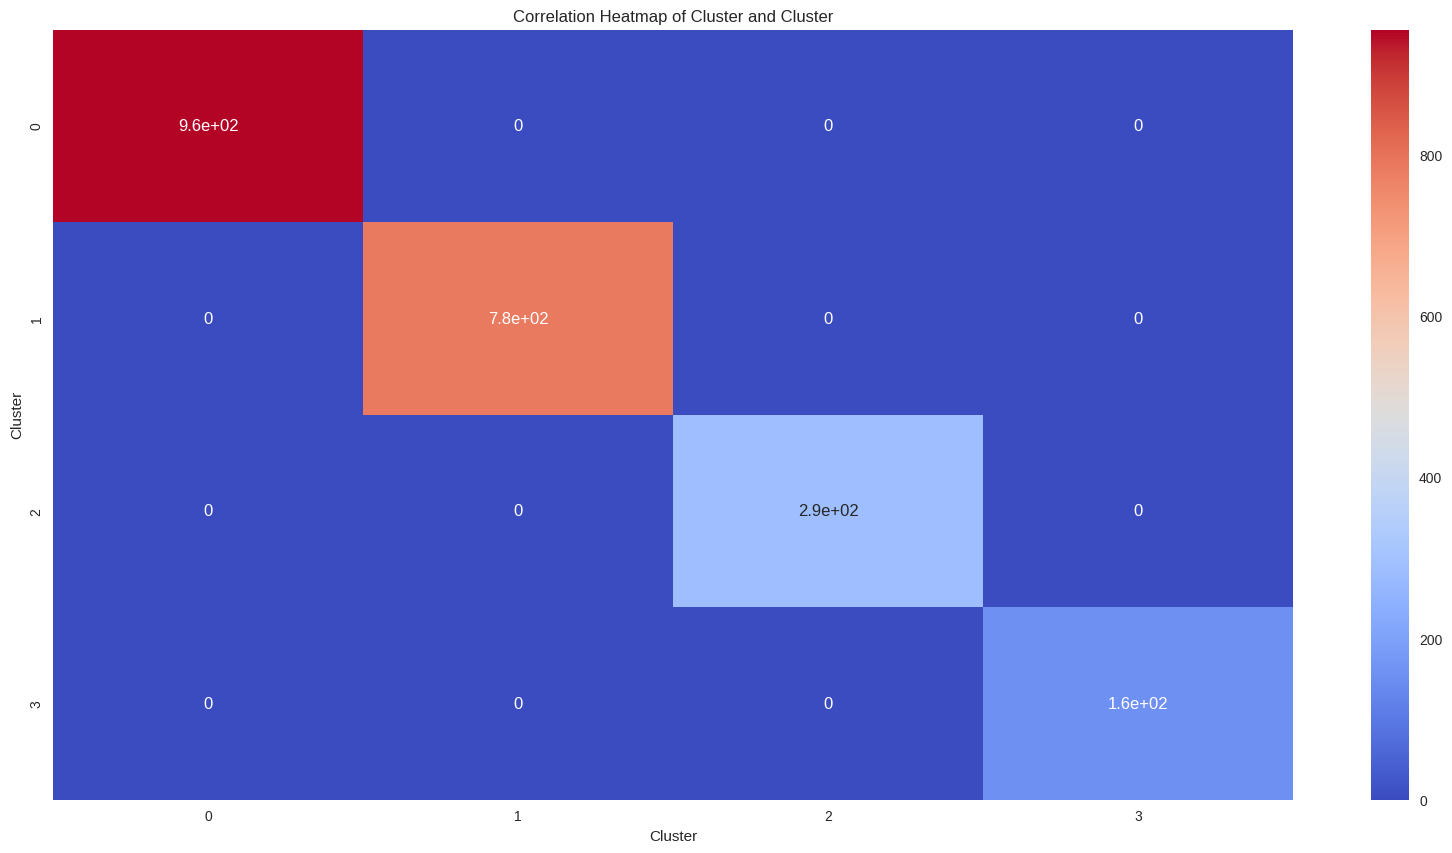

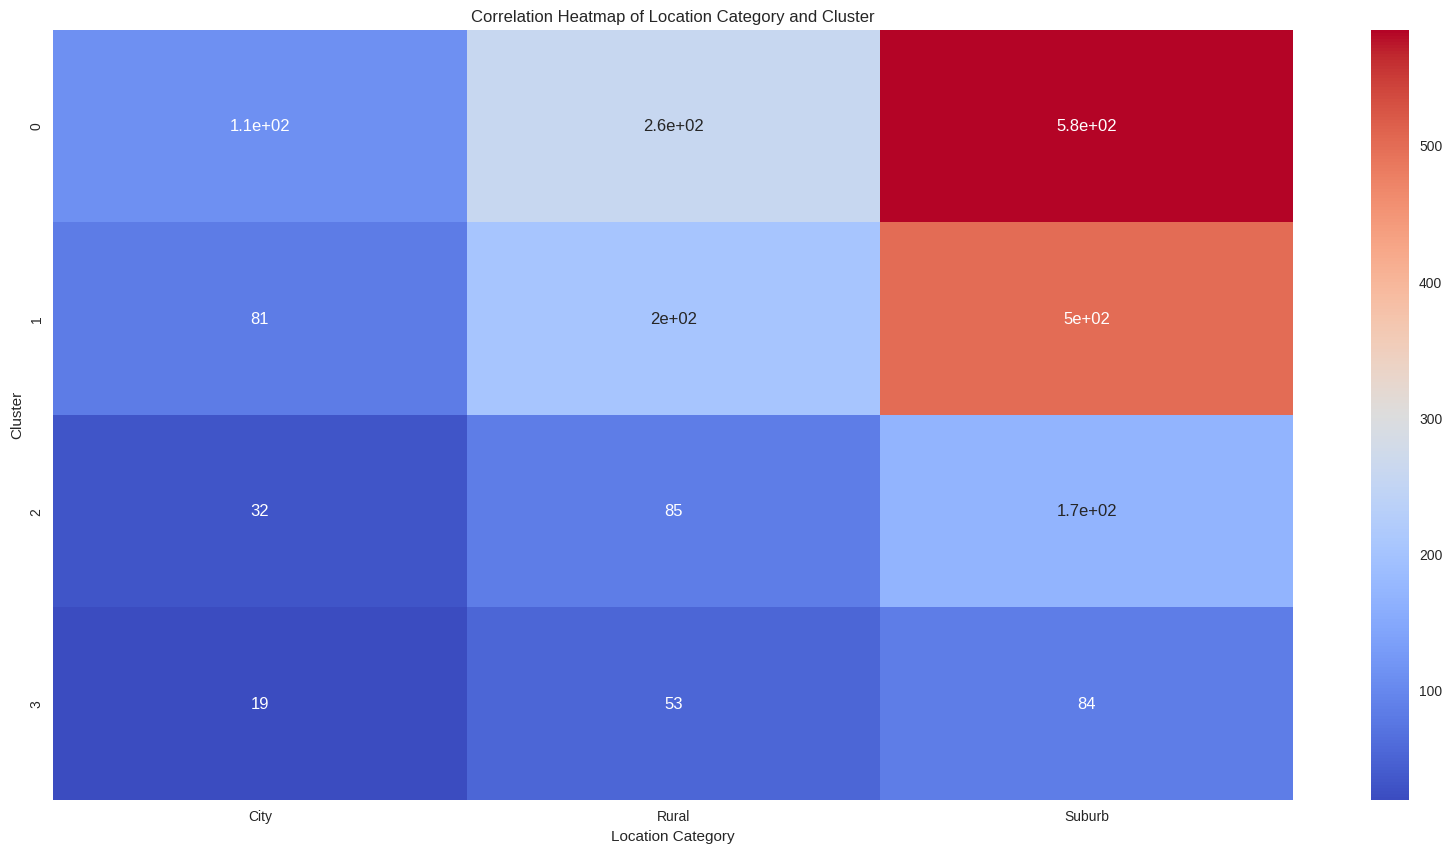

In [63]:
# Heatmap atau stacked bar chart untuk variabel kategorikal
for kol in dfEDA2.columns.tolist():
    contingency_table = pd.crosstab(dfEDA2['Cluster'], dfEDA2[kol])
    plt.figure(figsize=(20, 10))
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap of {kol} and Cluster')
    plt.xlabel(kol)
    plt.ylabel('Cluster')
    plt.show()


# Supevised

## Feature Engineering

### Split betweem x and y

In [ ]:
# menjabarkan x dan y
x = df_gmm.drop('Cluster', axis=1)
y = df_gmm[['Cluster']]

print('Data x', x)
print('Data y', y)

Data x       Age  Gender Item Purchased     Category  Purchase Amount (USD)  \
0      55    Male         Blouse     Clothing                     53   
1      19    Male        Sweater     Clothing                     64   
2      50    Male          Jeans     Clothing                     73   
3      21    Male        Sandals     Footwear                     90   
5      46    Male       Sneakers     Footwear                     20   
...   ...     ...            ...          ...                    ...   
3892   35  Female        Jewelry  Accessories                     86   
3893   21  Female            Hat  Accessories                     64   
3895   40  Female         Hoodie     Clothing                     28   
3896   52  Female       Backpack  Accessories                     49   
3898   44  Female          Shoes     Footwear                     77   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter            3.1   
1   

### Split between Train-set and Test-set

In [ ]:
# split data dengan composisi 90% dan 10% dimana 90% data latih, dan 10% data uji
xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size=0.1, random_state=0)

print('Ukuran Train Set : ', xTrain.shape)
print('Ukuran Test Set  : ', xTest.shape)

Ukuran Train Set :  (1962, 17)
Ukuran Test Set  :  (219, 17)


### Column Transformer

In [ ]:
# membuat pipeline bedasarkan model terbaik
pipeNum = make_pipeline(SimpleImputer(strategy='mean'),
                             StandardScaler())

pipeKat = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessor = ColumnTransformer([
    ('num', pipeNum, numerik),
    ('kat', pipeKat, kategorik)
])

## Model Baseline

In [ ]:
# model definition

# Naive Bayes
toDense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

pipeNB = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', toDense),
    ('classifier', GaussianNB())
])

# K-Nearest Neighbors
pipeKNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Support Vector Machine
pipeSVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Logistic Regression
pipeLR = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Decision Tree
pipeDT = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Random Forest
pipeRF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Gradient Boost
pipeGB = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# ADA Boost
pipeADA = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

## Model Train

In [ ]:
# model train
%%time
pipeNB.fit(xTrain, yTrain)

CPU times: user 38.4 ms, sys: 0 ns, total: 38.4 ms
Wall time: 45.8 ms


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7eed9c5bee60>)),
                ('classifier', GaussianNB())])

In [ ]:
# model train
%%time
pipeKNN.fit(xTrain, yTrain)

CPU times: user 42.8 ms, sys: 749 µs, total: 43.5 ms
Wall time: 47.8 ms


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
# model train
%%time
pipeSVM.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 389 ms, sys: 0 ns, total: 389 ms
Wall time: 392 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', SVC())])

In [ ]:
# model train
%%time
pipeLR.fit(xTrain, yTrain)

CPU times: user 56.6 ms, sys: 191 µs, total: 56.7 ms
Wall time: 56.6 ms


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# model train
%%time
pipeDT.fit(xTrain, yTrain)

CPU times: user 44.4 ms, sys: 0 ns, total: 44.4 ms
Wall time: 43.6 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
# model train
%%time
pipeRF.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: user 448 ms, sys: 1.56 ms, total: 449 ms
Wall time: 457 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
# model train
%%time
pipeGB.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2.17 s, sys: 2.7 ms, total: 2.18 s
Wall time: 2.22 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', GradientBoostingClassifier())])

In [ ]:
# model train
%%time
pipeADA.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


CPU times: user 332 ms, sys: 0 ns, total: 332 ms
Wall time: 342 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Purchase Amount (USD)',
                                                   'Review Rating',
                                                   'Previous Purchases']),
                                                 ('kat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Item Purchased',
                                                   'Category', 'Location',
                                                   'Size', 'Color', 'Season',
                                                   'Subscription Status',
                                                   'Shipping Type',
                                                   'Discount Applied',
                                                   'Promo Code Used',
                                                   'Payment Method',
                                                   'Frequency of '
                                                   'Purchases'])])),
                ('classifier', AdaBoostClassifier())])

## Model Evaluation

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_NB = pipeNB.predict(xTrain)
yPredTest_NB = pipeNB.predict(xTest)
yPredTrain_NB

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# membuat custom f1 score
weightedF1Score = make_scorer(f1_score, average='weighted')

In [ ]:
# Evaluasi model
# Train
f1TrainCV_NB = cross_val_score(pipeNB,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_NB)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_NB.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_NB.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_NB.mean()-f1TrainCV_NB.std()) , '-', (f1TrainCV_NB.mean()+f1TrainCV_NB.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - All - Cross Validation  :  [0.81072779 0.83145075 0.95693182 0.87980733 0.90186726]
F1 Score - Mean - Cross Validation :  0.8761569914838058
F1 Score - Std - Cross Validation  :  0.05192021614767923
F1 Score - Range of Test-Set       :  0.8242367753361265 - 0.928077207631485


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - Test Set   :  0.9273886864765583 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        83
           1       0.79      1.00      0.88        53
           2       0.87      1.00      0.93        13
           3       1.00      0.80      0.89        70

    accuracy                           0.93       219
   macro avg       0.91      0.94      0.92       219
weighted avg       0.94      0.93      0.93       219
 

Confusion Matrix      : 


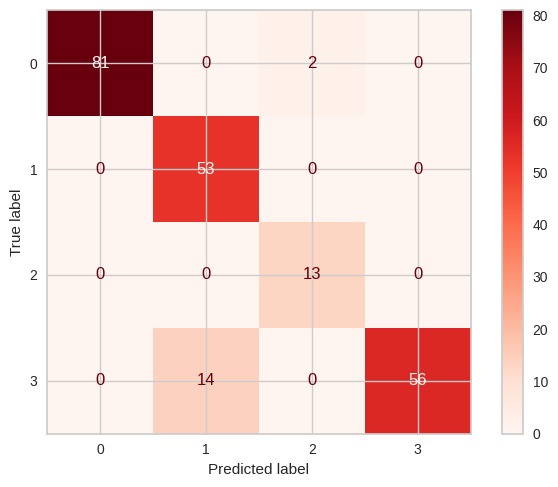

In [ ]:
# Evaluasi model
# Test
f1Test_NB = f1_score(yTest, yPredTest_NB, average='weighted')

print('F1 Score - Test Set   : ', f1Test_NB, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_NB), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeNB, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_KNN = pipeKNN.predict(xTrain)
yPredTest_KNN = pipeKNN.predict(xTest)
yPredTrain_KNN

array([0, 0, 3, ..., 0, 0, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_KNN = cross_val_score(pipeKNN,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_KNN)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_KNN.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_KNN.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_KNN.mean()-f1TrainCV_KNN.std()) , '-', (f1TrainCV_KNN.mean()+f1TrainCV_KNN.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

F1 Score - All - Cross Validation  :  [0.90527917 0.86610944 0.93021394 0.88115272 0.87790518]
F1 Score - Mean - Cross Validation :  0.8921320892390072
F1 Score - Std - Cross Validation  :  0.022905033563762733
F1 Score - Range of Test-Set       :  0.8692270556752445 - 0.9150371228027699


F1 Score - Test Set   :  0.8945501913159574 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        83
           1       0.84      0.96      0.89        53
           2       1.00      0.31      0.47        13
           3       0.97      0.86      0.91        70

    accuracy                           0.90       219
   macro avg       0.93      0.78      0.81       219
weighted avg       0.91      0.90      0.89       219
 

Confusion Matrix      : 


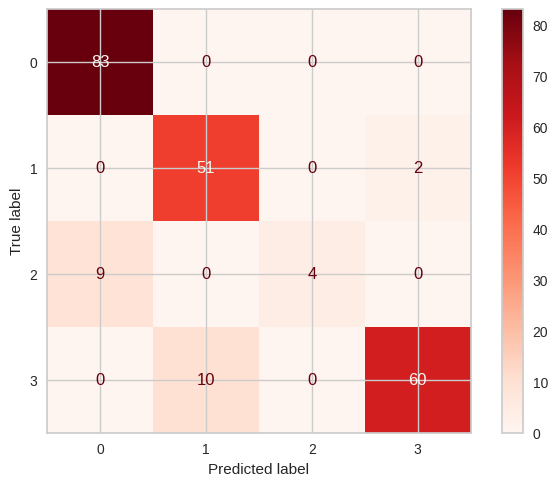

In [ ]:
# Evaluasi model
# Test
f1Test_KNN = f1_score(yTest, yPredTest_KNN, average='weighted')

print('F1 Score - Test Set   : ', f1Test_KNN, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_KNN), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeKNN, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_SVM = pipeSVM.predict(xTrain)
yPredTest_SVM = pipeSVM.predict(xTest)
yPredTrain_SVM

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_SVM = cross_val_score(pipeSVM,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_SVM)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_SVM.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_SVM.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_SVM.mean()-f1TrainCV_SVM.std()) , '-', (f1TrainCV_SVM.mean()+f1TrainCV_SVM.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

F1 Score - All - Cross Validation  :  [0.99745454 0.99490685 0.99233724 0.99233818 0.99744805]
F1 Score - Mean - Cross Validation :  0.9948969744343026
F1 Score - Std - Cross Validation  :  0.0022868704298204777
F1 Score - Range of Test-Set       :  0.9926101040044821 - 0.997183844864123


F1 Score - Test Set   :  0.995428238331182 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        13
           3       0.99      1.00      0.99        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


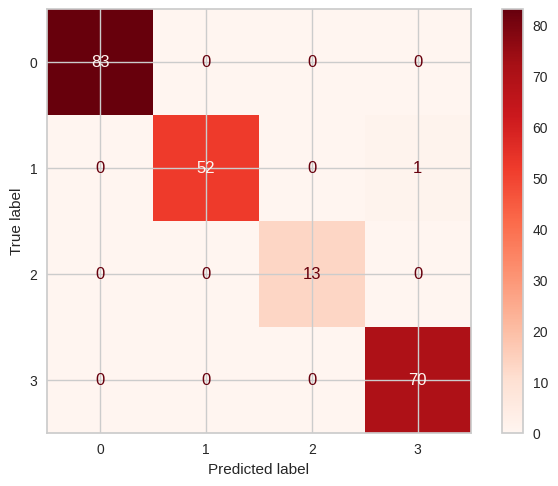

In [ ]:
# Evaluasi model
# Test
f1Test_SVM = f1_score(yTest, yPredTest_SVM, average='weighted')

print('F1 Score - Test Set   : ', f1Test_SVM, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_SVM), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeSVM, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_LR = pipeLR.predict(xTrain)
yPredTest_LR = pipeLR.predict(xTest)
yPredTrain_LR

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_LR = cross_val_score(pipeLR,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_LR)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_LR.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_LR.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_LR.mean()-f1TrainCV_LR.std()) , '-', (f1TrainCV_LR.mean()+f1TrainCV_LR.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - All - Cross Validation  :  [1.         0.9974545  0.99489386 0.99744811 1.        ]
F1 Score - Mean - Cross Validation :  0.9979592939378342
F1 Score - Std - Cross Validation  :  0.0019100773871099782
F1 Score - Range of Test-Set       :  0.9960492165507242 - 0.9998693713249442


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


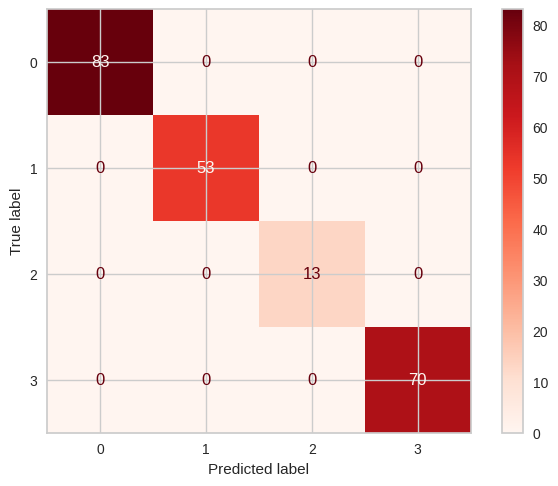

In [ ]:
# Evaluasi model
# Test
f1Test_LR = f1_score(yTest, yPredTest_LR, average='weighted')

print('F1 Score - Test Set   : ', f1Test_LR, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_LR), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeLR, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_DT = pipeDT.predict(xTrain)
yPredTest_DT = pipeDT.predict(xTest)
yPredTrain_DT

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_DT = cross_val_score(pipeDT,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_DT)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_DT.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_DT.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_DT.mean()-f1TrainCV_DT.std()) , '-', (f1TrainCV_DT.mean()+f1TrainCV_DT.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


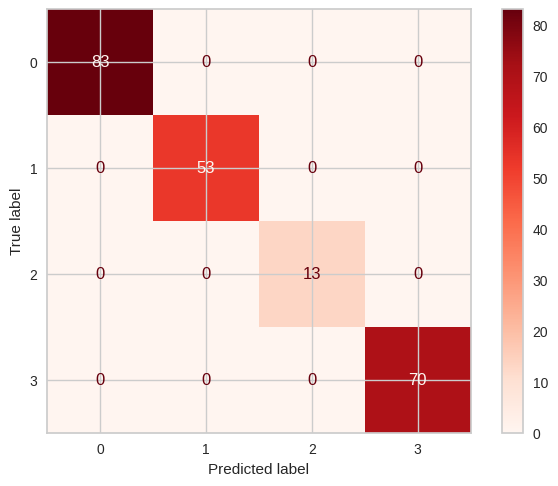

In [ ]:
# Evaluasi model
# Test
f1Test_DT = f1_score(yTest, yPredTest_DT, average='weighted')

print('F1 Score - Test Set   : ', f1Test_DT, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_DT), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeDT, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_RF = pipeRF.predict(xTrain)
yPredTest_RF = pipeRF.predict(xTest)
yPredTrain_RF

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_RF = cross_val_score(pipeRF,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_RF)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_RF.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_RF.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_RF.mean()-f1TrainCV_RF.std()) , '-', (f1TrainCV_RF.mean()+f1TrainCV_RF.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


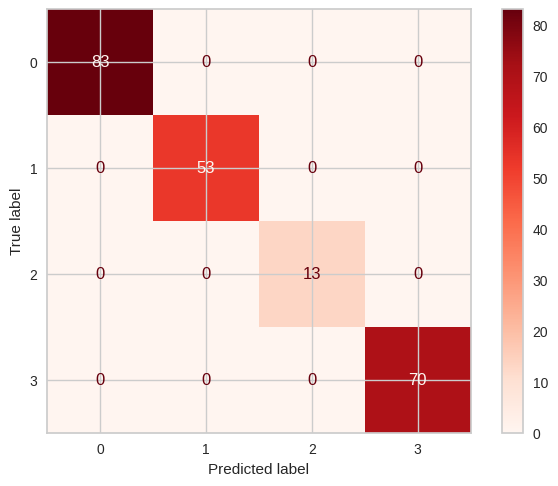

In [ ]:
# Evaluasi model
# Test
f1Test_RF = f1_score(yTest, yPredTest_RF, average='weighted')

print('F1 Score - Test Set   : ', f1Test_RF, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_RF), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeRF, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_GB = pipeGB.predict(xTrain)
yPredTest_GB = pipeGB.predict(xTest)
yPredTrain_GB

array([0, 0, 3, ..., 0, 2, 1])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_GB = cross_val_score(pipeGB,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_GB)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_GB.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_GB.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_GB.mean()-f1TrainCV_GB.std()) , '-', (f1TrainCV_GB.mean()+f1TrainCV_GB.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


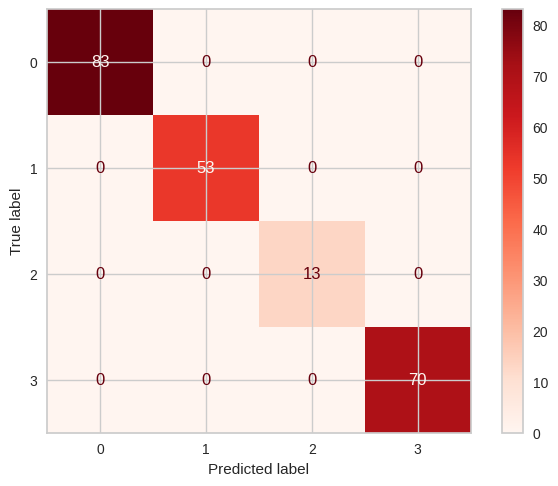

In [ ]:
# Evaluasi model
# Test
f1Test_GB = f1_score(yTest, yPredTest_GB, average='weighted')

print('F1 Score - Test Set   : ', f1Test_GB, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_GB), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeGB, xTest, yTest, cmap='Reds'))

In [ ]:
# mengevaluasi hasil dari model
yPredTrain_ADA = pipeADA.predict(xTrain)
yPredTest_ADA = pipeADA.predict(xTest)
yPredTrain_ADA

array([0, 0, 3, ..., 0, 0, 3])

In [ ]:
# Evaluasi model
# Train
f1TrainCV_ADA = cross_val_score(pipeADA,
                                     xTrain,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_ADA)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_ADA.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_ADA.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_ADA.mean()-f1TrainCV_ADA.std()) , '-', (f1TrainCV_ADA.mean()+f1TrainCV_ADA.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  w

F1 Score - All - Cross Validation  :  [0.53897482 0.53876897 0.54119411 0.53824913 0.53782106]
F1 Score - Mean - Cross Validation :  0.5390016161546469
F1 Score - Std - Cross Validation  :  0.0011680588217201004
F1 Score - Range of Test-Set       :  0.5378335573329268 - 0.540169674976367


F1 Score - Test Set   :  0.5833299959435846 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        83
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        13
           3       0.57      1.00      0.73        70

    accuracy                           0.70       219
   macro avg       0.36      0.50      0.41       219
weighted avg       0.51      0.70      0.58       219
 

Confusion Matrix      : 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


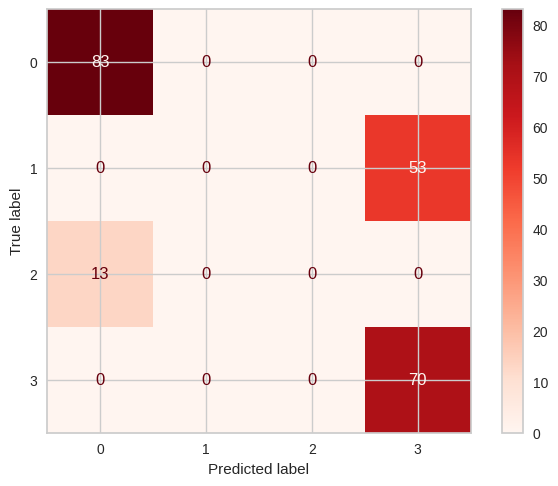

In [ ]:
# Evaluasi model
# Test
f1Test_ADA = f1_score(yTest, yPredTest_ADA, average='weighted')

print('F1 Score - Test Set   : ', f1Test_ADA, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTest_ADA), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeADA, xTest, yTest, cmap='Reds'))

### Score Evaluation

In [ ]:
# mencari model terbaik
modelName = ['Naive Bayes', 'KNN', 'SVM', 'Logistic Regression', 'Decision Tree',
             'Random Forest', 'GBoost', 'Ada Boost']
ModelTrainScore = [round(f1TrainCV_NB.max(), 4), round(f1TrainCV_KNN.max(), 4), round(f1TrainCV_SVM.max(), 4),
                   round(f1TrainCV_LR.max(), 4), round(f1TrainCV_DT.max(), 4), round(f1TrainCV_RF.max(), 4),
                   round(f1TrainCV_GB.max(), 4), round(f1TrainCV_ADA.max(), 4)]
ModelTestScore = [round(f1Test_NB, 4), round(f1Test_KNN, 4), round(f1Test_SVM, 4), round(f1Test_NB, 4),
                  round(f1Test_DT, 4), round(f1Test_RF, 4), round(f1Test_GB, 4), round(f1Test_ADA, 4)]

pd.DataFrame(
    {'Model Name': modelName,
     'F1 Score - Train Set': ModelTrainScore,
     'F1 Score - Test Set': ModelTestScore
    })

Model Name  F1 Score - Train Set  F1 Score - Test Set
0          Naive Bayes                0.9569               0.9274
1                  KNN                0.9302               0.8946
2                  SVM                0.9975               0.9954
3  Logistic Regression                1.0000               0.9274
4        Decision Tree                1.0000               1.0000
5        Random Forest                1.0000               1.0000
6               GBoost                1.0000               1.0000
7            Ada Boost                0.5412               0.5833

Model Decision Tree, Rnadom Forest, dan Gradient Boost berhasil mendapatkan F1 score 100% pada train set dan test set, ini menunjukan bahwa model bekerja sangat baik dan memiliki fiting yang baik. Model yang akan hyper tunning adalah Gradient Boost, meski Decision Tree dan Random Forest bekerja sangat baik juga, tetapi karna kemampuan Gradient boost yang dapat menghandle data yang cukup rumit, handling overfitting, dan model dapat melakukan continuous learning tanpa harus dilatih dari awal, sehingga membuat Gradient Boost sangat cocok untuk project ini

## Train Gradient Boost Model with Hyperparameter Tunning

In [ ]:
# menjabarkan hyperparameter
learningRate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
nEstimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
maxDepth = [int(x) for x in np.linspace(10, 1000, 10)]
minSamplesSplit = [2, 5, 10, 14]
minSamplesLeaf = [1, 2, 4, 6, 8]
params = {'classifier__learning_rate': learningRate,
          'classifier__n_estimators': nEstimators,
          'classifier__max_depth': maxDepth,
          'classifier__min_samples_split': minSamplesSplit,
          'classifier__min_samples_leaf': minSamplesLeaf}
params

{'classifier__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 'classifier__n_estimators': [200,
  400,
  600,
  800,
  1000,
  1200,
  1400,
  1600,
  1800,
  2000],
 'classifier__max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'classifier__min_samples_split': [2, 5, 10, 14],
 'classifier__min_samples_leaf': [1, 2, 4, 6, 8]}

In [ ]:
# train model Gradient Boost
%%time

randomCV_GB = RandomizedSearchCV(pipeGB,
                                 param_distributions=params,
                                 n_iter=10,
                                 cv=5,
                                 random_state=0,
                                 n_jobs=-1,
                                 scoring='f1')

randomCV_GB.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5.59 s, sys: 557 ms, total: 6.14 s
Wall time: 3min 11s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Purchase '
                                                                                'Amount '
                                                                                '(USD)',
                                                                                'Review '
                                                                                'Rating',
                                                                                'Previous '
                                                                                'Purchases']),
                                                                              ('kat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('...
                   n_jobs=-1,
                   param_distributions={'classifier__learning_rate': [0.1, 0.2,
                                                                      0.3, 0.4,
                                                                      0.5, 0.6,
                                                                      0.7, 0.8,
                                                                      0.9, 1],
                                        'classifier__max_depth': [10, 120, 230,
                                                                  340, 450, 560,
                                                                  670, 780, 890,
                                                                  1000],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4, 6,
                                                                         8],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          14],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000]},
                   random_state=0, scoring='f1')

In [ ]:
# mencari hyperparameter terbaik
randomCV_GB.best_params_

{'classifier__n_estimators': 600,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 6,
 'classifier__max_depth': 340,
 'classifier__learning_rate': 0.2}

In [ ]:
# membuat model bedasarkan model terbaik
modelBest = randomCV_GB.best_estimator_

F1 Score - Train Set   :  1.0 

F1 Score - Test Set   :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219
 

Confusion Matrix      : 


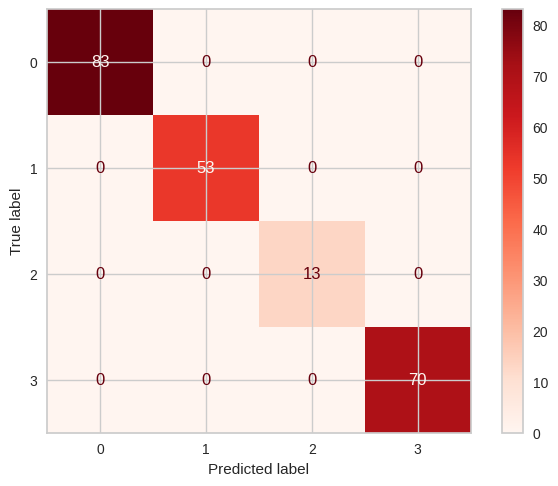

In [ ]:
# Evaluasi model terbaik
yBestTrain = modelBest.predict(xTrain)
yBestTest = modelBest.predict(xTest)
f1BestTrain = f1_score(yTrain, yBestTrain, average='weighted')
f1BestTest = f1_score(yTest, yBestTest, average='weighted')

print('F1 Score - Train Set   : ', f1BestTrain, '\n')
print('F1 Score - Test Set   : ', f1BestTest, '\n')
print('Classification Report : \n', classification_report(yTest, yBestTest), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(modelBest, xTest, yTest, cmap='Reds'))

In [ ]:
# membandingkan baseline Gradient Boost dengan Hyperparameter Gradient Boost
# mencari model terbaik
modelName = ['Gradient Boost Baseline', 'Gradient Boost Hyperparameter']
ModelTrainScore = [round(f1TrainCV_GB.max(), 4), round(f1BestTrain, 4)]
ModelTestScore = [round(f1Test_GB, 4), round(f1BestTest, 4)]

pd.DataFrame(
    {'Model Name': modelName,
     'F1 Score - Train Set': ModelTrainScore,
     'F1 Score - Test Set': ModelTestScore,
    })

Model Name  F1 Score - Train Set  F1 Score - Test Set
0        Gradient Boost Baseline                   1.0                  1.0
1  Gradient Boost Hyperparameter                   1.0                  1.0

model Gradient Boost tanpa hyperparameter dan dengan hyperparameter memiliki perfoma yang sama, tetapi yang dipilih adalah Gradient Boost dengan hyperparameter karna sudah di tuning dan di cross validasi sehingga membuat model ini adalah yang terbaik dari model yang lain.

# Model Saving

In [ ]:
import json
import pickle

In [ ]:
#Menyimpan File, Scaler, Encoder, Model
with open('list_kolom_numerik.txt', 'w') as colNum:
  json.dump(numerik, colNum)

with open('list_kolom_kategorik.txt', 'w') as colKat:
  json.dump(kategorik, colKat)

with open('modelBest.pkl', 'wb') as modeling:
  pickle.dump(modelBest, modeling)